In [9]:
# Questions for data analysis(visualizations):

# Is the number of petitions with Data Engineer job title increasing over time?
# Which part of the US has the most Hardware Engineer jobs?
# Which industry has the most number of Data Scientist positions?
# Which employers file the most petitions each year?

#  Data Analysis on H1B Dataset(2011-2016):


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

import numpy as np;
import scipy as sci;
from scipy.optimize import curve_fit;

import csv;
import matplotlib.pyplot as plt;
from sklearn.cluster import KMeans
import pandas as pd
import time


In [11]:
h1b=pd.read_csv('h1b_kaggle.csv', index_col=0)
h1b.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [12]:
h1b['PREVAILING_WAGE'].unique()

array([3.6067000e+04, 2.4267400e+05, 1.9306600e+05, ..., 3.3621300e+05,
       1.3000080e+05, 1.3701792e+08])

In [13]:
status = h1b['CASE_STATUS'].value_counts()
status

CERTIFIED                                             2615623
CERTIFIED-WITHDRAWN                                    202659
DENIED                                                  94346
WITHDRAWN                                               89799
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    2
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64

In [14]:
h1b.tail()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
3002454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"NYC, NEW YORK",-74.005941,40.712784
3002455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"SOUTH LAKE, TEXAS",-97.134178,32.941236
3002456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"CLINTON, NEW JERSEY",-74.909890,40.636768
3002457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"OWINGS MILL, MARYLAND",-76.780253,39.419550
3002458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"ALTANTA, GEORGIA",-84.387982,33.748995


In [15]:
h1b = h1b.dropna()
h1b.tail()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
3002441,WITHDRAWN,"ORACLE AMERICA, INC.","Software Developers, Applications",SOFTWARE ENGINEER (SOFTWARE DEVELOPER 2),Y,64800.0,2011.0,"REDWOOD SHORES, CALIFORNIA",-122.245536,37.536413
3002442,WITHDRAWN,B & D DENTAL CORP.,Materials Scientists,MATERIALS SCIENTIST,N,70553.6,2011.0,"WEST VALLEY, UTAH",-112.001050,40.691613
3002443,WITHDRAWN,"MEDTECH STAFFING & SOLUTIONS, INC",Market Research Analysts and Marketing Special...,MARKET RESEARCH ANALYST,Y,33800.0,2011.0,"AKRON, OHIO",-81.519005,41.081445
3002444,WITHDRAWN,LARSEN & TOUBRO LIMITED,Commercial and Industrial Designers,DESIGN ENGINEER,Y,59800.0,2011.0,"CHELMSFORD, MASSACHUSETTS",-71.367284,42.599814
3002445,WITHDRAWN,LARSEN & TOUBRO LIMITED,Commercial and Industrial Designers,DESIGN ENGINEER,Y,59800.0,2011.0,"CHELMSFORD, MASSACHUSETTS",-71.367284,42.599814


In [16]:
name_count = h1b.groupby('SOC_NAME').size()
top_10_title = name_count.sort_values(ascending=False)[:10]
print(top_10_title)

SOC_NAME
Computer Systems Analysts                286598
Computer Programmers                     222563
SOFTWARE DEVELOPERS, APPLICATIONS        218833
COMPUTER SYSTEMS ANALYSTS                212579
Software Developers, Applications        190063
COMPUTER PROGRAMMERS                     169473
COMPUTER OCCUPATIONS, ALL OTHER          107370
Computer Occupations, All Other           68564
Software Developers, Systems Software     43723
SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE     38921
dtype: int64


In [17]:
h1b.WORKSITE.nunique()

2487

In [18]:
name_count = h1b.groupby('EMPLOYER_NAME').size()
top_10_EMPLOYER_NAME = name_count.sort_values(ascending=False)[:10]
print(top_10_EMPLOYER_NAME)

EMPLOYER_NAME
INFOSYS LIMITED                                    130257
TATA CONSULTANCY SERVICES LIMITED                   64273
WIPRO LIMITED                                       45673
DELOITTE CONSULTING LLP                             35999
IBM INDIA PRIVATE LIMITED                           33585
ACCENTURE LLP                                       33226
MICROSOFT CORPORATION                               25551
HCL AMERICA, INC.                                   22488
ERNST & YOUNG U.S. LLP                              18094
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION     17322
dtype: int64


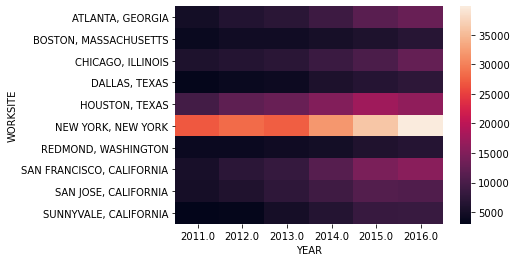

In [19]:
res = h1b[h1b['WORKSITE'].isin(h1b['WORKSITE'].value_counts().head(10).index)]
sns.heatmap(res.groupby(['WORKSITE','YEAR']).size().unstack())

# Dropping the NaN values 


In [20]:
h1b.dropna(inplace=True)


In [21]:
h1b. isnull().sum()

CASE_STATUS           0
EMPLOYER_NAME         0
SOC_NAME              0
JOB_TITLE             0
FULL_TIME_POSITION    0
PREVAILING_WAGE       0
YEAR                  0
WORKSITE              0
lon                   0
lat                   0
dtype: int64

In [22]:
print('total records:{}'.format(len(h1b)))

total records:2877765


In [23]:
h1b

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003
...,...,...,...,...,...,...,...,...,...,...
3002441,WITHDRAWN,"ORACLE AMERICA, INC.","Software Developers, Applications",SOFTWARE ENGINEER (SOFTWARE DEVELOPER 2),Y,64800.0,2011.0,"REDWOOD SHORES, CALIFORNIA",-122.245536,37.536413
3002442,WITHDRAWN,B & D DENTAL CORP.,Materials Scientists,MATERIALS SCIENTIST,N,70553.6,2011.0,"WEST VALLEY, UTAH",-112.001050,40.691613
3002443,WITHDRAWN,"MEDTECH STAFFING & SOLUTIONS, INC",Market Research Analysts and Marketing Special...,MARKET RESEARCH ANALYST,Y,33800.0,2011.0,"AKRON, OHIO",-81.519005,41.081445
3002444,WITHDRAWN,LARSEN & TOUBRO LIMITED,Commercial and Industrial Designers,DESIGN ENGINEER,Y,59800.0,2011.0,"CHELMSFORD, MASSACHUSETTS",-71.367284,42.599814


# Converted the data-type of YEAR from float to int

In [24]:
h1b.YEAR=h1b.YEAR.astype('int64')

In [25]:
h1b.PREVAILING_WAGE #PREVAILING_WAGE can be float dtype

1           36067.0
2          242674.0
3          193066.0
4          220314.0
5          157518.4
             ...   
3002441     64800.0
3002442     70553.6
3002443     33800.0
3002444     59800.0
3002445     59800.0
Name: PREVAILING_WAGE, Length: 2877765, dtype: float64

# Dropping Duplicated values from the dataset




In [26]:
h1b.drop_duplicates(inplace=True)


In [27]:
h1b.duplicated()


1          False
2          False
3          False
4          False
5          False
           ...  
3002440    False
3002441    False
3002442    False
3002443    False
3002444    False
Length: 1959103, dtype: bool

In [28]:
h1b.corr()

,PREVAILING_WAGE,YEAR,lon,lat
PREVAILING_WAGE,1.000000,-0.008138,-0.001127,0.000881
YEAR,-0.008138,1.000000,-0.020736,0.014094
lon,-0.001127,-0.020736,1.000000,0.111382
lat,0.000881,0.014094,0.111382,1.000000


In [29]:
h1b.isnull().any()

CASE_STATUS           False
EMPLOYER_NAME         False
SOC_NAME              False
JOB_TITLE             False
FULL_TIME_POSITION    False
PREVAILING_WAGE       False
YEAR                  False
WORKSITE              False
lon                   False
lat                   False
dtype: bool

In [30]:
h1b.isnull().sum().sort_values(ascending = False)

lat                   0
lon                   0
WORKSITE              0
YEAR                  0
PREVAILING_WAGE       0
FULL_TIME_POSITION    0
JOB_TITLE             0
SOC_NAME              0
EMPLOYER_NAME         0
CASE_STATUS           0
dtype: int64

In [31]:
h1b['EMPLOYER_NAME'].value_counts()[:10]

INFOSYS LIMITED                                    25446
IBM INDIA PRIVATE LIMITED                          20477
WIPRO LIMITED                                      18813
TATA CONSULTANCY SERVICES LIMITED                  17630
DELOITTE CONSULTING LLP                            16110
ACCENTURE LLP                                      15132
HCL AMERICA, INC.                                  11826
IBM CORPORATION                                     9511
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION     8926
ERNST & YOUNG U.S. LLP                              7168
Name: EMPLOYER_NAME, dtype: int64

In [32]:
## WOW..!! approx. 150K is the Average PREVAILING_WAGE of all the petitions 
h1b['PREVAILING_WAGE'].sum()/h1b.shape[0]


178370.01889186772

In [33]:
h1b['WORKSITE'].value_counts()[:20]

NEW YORK, NEW YORK                  136124
HOUSTON, TEXAS                       54956
SAN FRANCISCO, CALIFORNIA            47278
CHICAGO, ILLINOIS                    34039
SAN JOSE, CALIFORNIA                 32283
ATLANTA, GEORGIA                     28470
BOSTON, MASSACHUSETTS                21884
LOS ANGELES, CALIFORNIA              20932
SUNNYVALE, CALIFORNIA                20686
SANTA CLARA, CALIFORNIA              20221
AUSTIN, TEXAS                        19344
DALLAS, TEXAS                        18784
SAN DIEGO, CALIFORNIA                17578
WASHINGTON, DISTRICT OF COLUMBIA     16631
IRVING, TEXAS                        16148
MOUNTAIN VIEW, CALIFORNIA            16056
JERSEY CITY, NEW JERSEY              15941
CHARLOTTE, NORTH CAROLINA            15450
SEATTLE, WASHINGTON                  15050
MIAMI, FLORIDA                       13668
Name: WORKSITE, dtype: int64

In [34]:
pd.options.display.float_format = '{:,.2f}'.format
h1b.groupby('WORKSITE').agg({'PREVAILING_WAGE':'mean'}).sort_values(by = ['PREVAILING_WAGE'],ascending = False)

,PREVAILING_WAGE
WORKSITE,
"PEKIN, ILLINOIS","112,939,738.66"
"OWENS CROSS ROADS, ALABAMA","8,357,278.76"
"VERONA, PENNSYLVANIA","4,449,855.25"
"LIVERPOOL, NEW YORK","4,039,783.48"
"CASA GRANDE, ARIZONA","3,950,235.43"
...,...
"AJO, ARIZONA","35,112.29"
"LENOX, MASSACHUSETTS","34,468.38"
"PINON, ARIZONA","33,376.51"


In [35]:
h1b[h1b['WORKSITE'] == 'WASHINGTON, NA']

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat


In [36]:
h1b['CASE_STATUS'].value_counts()


CERTIFIED                                             1652785
CERTIFIED-WITHDRAWN                                    156692
DENIED                                                  76206
WITHDRAWN                                               73403
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
INVALIDATED                                                 1
REJECTED                                                    1
Name: CASE_STATUS, dtype: int64

In [37]:
h1b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1959103 entries, 1 to 3002444
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   CASE_STATUS         object 
 1   EMPLOYER_NAME       object 
 2   SOC_NAME            object 
 3   JOB_TITLE           object 
 4   FULL_TIME_POSITION  object 
 5   PREVAILING_WAGE     float64
 6   YEAR                int64  
 7   WORKSITE            object 
 8   lon                 float64
 9   lat                 float64
dtypes: float64(3), int64(1), object(6)
memory usage: 164.4+ MB


In [38]:
h1b.describe()

,PREVAILING_WAGE,YEAR,lon,lat
count,"1,959,103.00","1,959,103.00","1,959,103.00","1,959,103.00"
mean,"178,370.02","2,013.75",-92.06,38.08
std,"6,403,981.27",1.70,19.93,4.68
min,0.00,"2,011.00",-157.86,13.44
25%,"54,357.50","2,012.00",-111.93,34.17
50%,"66,456.00","2,014.00",-86.16,39.04
75%,"83,845.00","2,015.00",-75.51,40.87
max,"6,997,606,720.00","2,016.00",145.73,64.84


# Data Visualizations

# Total H1B Applications from 2011-2016

[Text(0, 0, '2011'),
 Text(0, 0, '2012'),
 Text(0, 0, '2013'),
 Text(0, 0, '2014'),
 Text(0, 0, '2015'),
 Text(0, 0, '2016')]

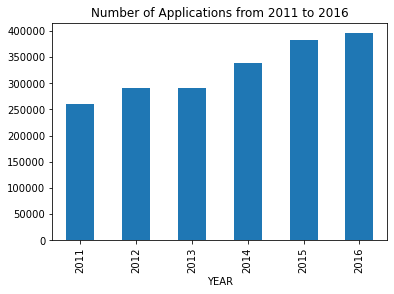

In [39]:
ap=h1b.groupby('YEAR').size().plot(title='Number of Applications from 2011 to 2016', kind='bar')
ap.set_xticklabels([2011,2012,2013,2014,2015,2016])

# Overall Trend of H1B Applications


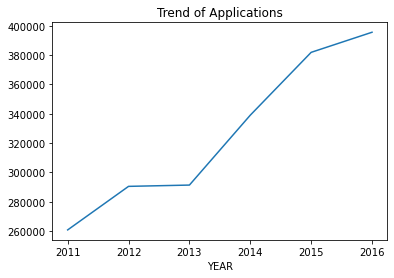

In [40]:
h1b.groupby('YEAR')['JOB_TITLE'].count().plot(title='Trend of Applications')

# Case Statuses Year-Wise

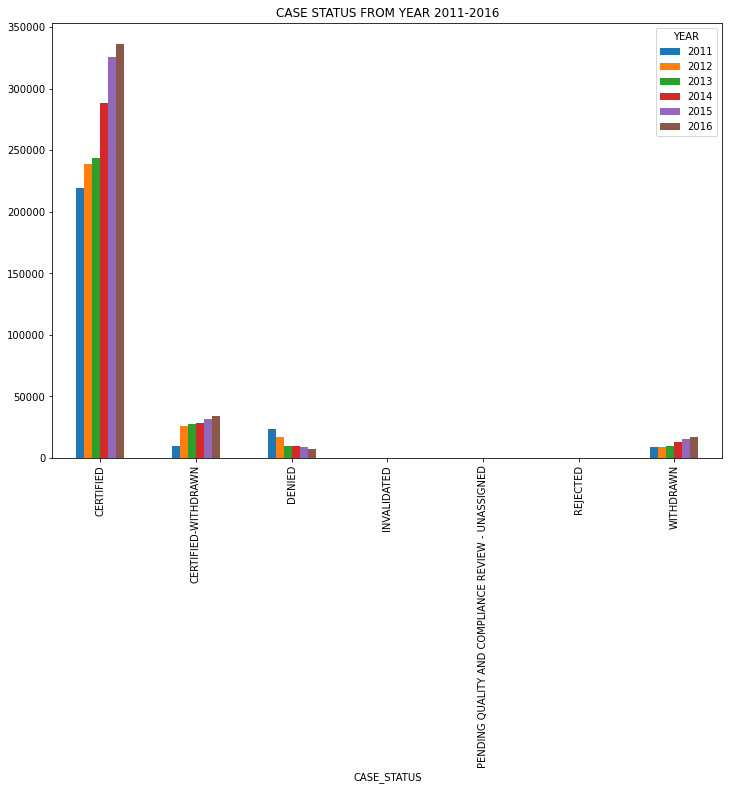

In [41]:
h1b[['CASE_STATUS','YEAR']].groupby(['CASE_STATUS','YEAR']).size().unstack().plot(kind='bar', title='CASE STATUS FROM YEAR 2011-2016',figsize=(12,8))

### Top 20 Company who sent highest H-1B visa applications.


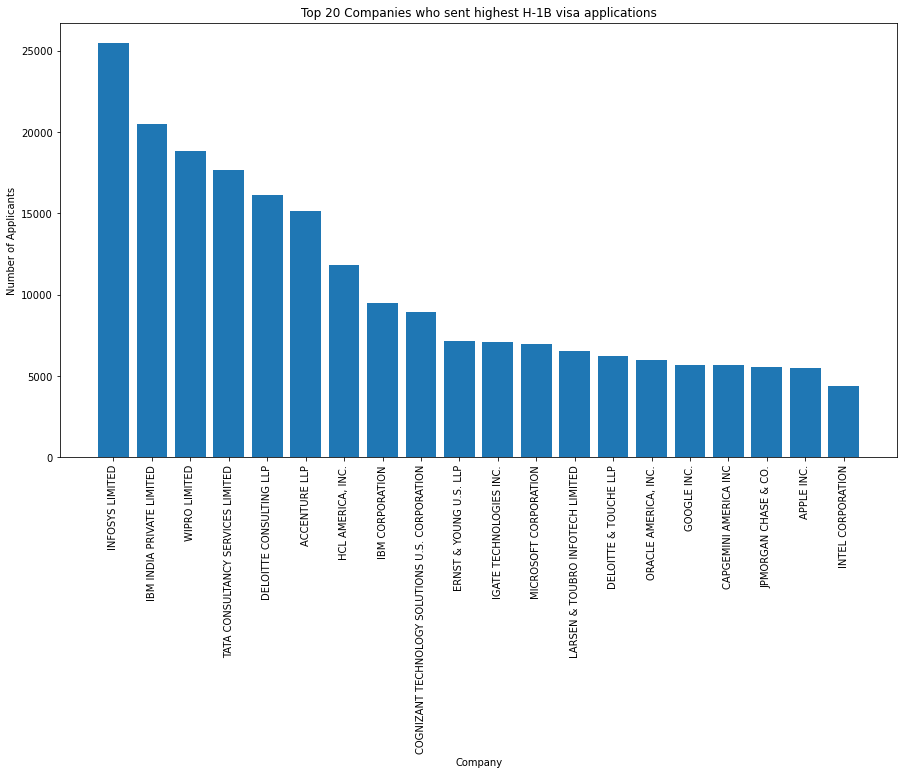

In [42]:
# plt.rcParams['figure.figsize']=(12,8)
# h1b.groupby('EMPLOYER_NAME').CASE_STATUS.count().nlargest(20).plot(kind='barh', title='TOP 20 employers filing H1Bs')
# Ploting companies who sent highgest H-1B visa applications

company = h1b['EMPLOYER_NAME'].value_counts()[:20]
plt.figure(figsize=(15,8))
plt.bar(x=company.index, height=company[:])
plt.title('Top 20 Companies who sent highest H-1B visa applications')
plt.xlabel('Company')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=90)
plt.show()

#### The conclusion from the figure:-
* Infosys, TCS, Wipro, Deloitte, accenture, IBM they are in high demands.

# Top 20 Job Titles which had most H1Bs filed 

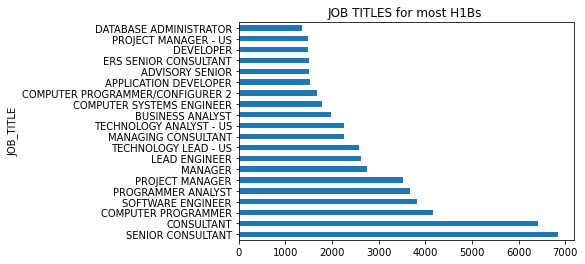

In [43]:
top_20=h1b.groupby('EMPLOYER_NAME').CASE_STATUS.count().nlargest(20).index.tolist()
top_20_df=h1b.loc[h1b.EMPLOYER_NAME.isin(top_20)]

top_20_df.groupby('JOB_TITLE').EMPLOYER_NAME.count().nlargest(20).plot(kind='barh', title='JOB TITLES for most H1Bs ')

The conclusion from the figure:-


Senior Consultants and Consultants got most H1Bs Filed

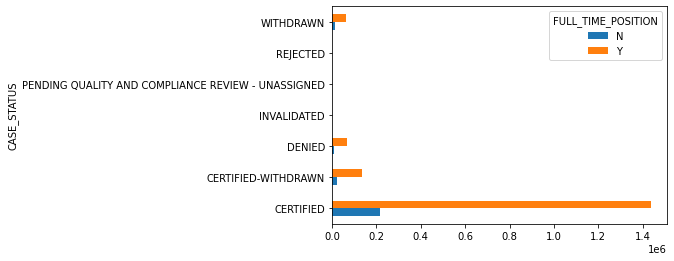

In [44]:
pd.crosstab(h1b.CASE_STATUS,h1b.FULL_TIME_POSITION).plot(kind='barh')

# Trend of Full-Time Positions over time

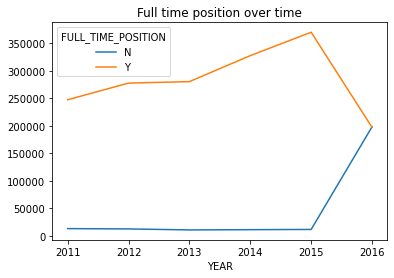

In [45]:
pd.crosstab(h1b.YEAR,h1b.FULL_TIME_POSITION).plot(title='Full time position over time')

Observation:

Most of the CERTIFIED h1bs are full time position 
The trend of full time jobs had fallen from year 2015 onwards.

# What about the salary of the companies with high h1bs?

Lets study Salary of 20 most common job title in comparison with all others

([], <a list of 0 Text major ticklabel objects>)

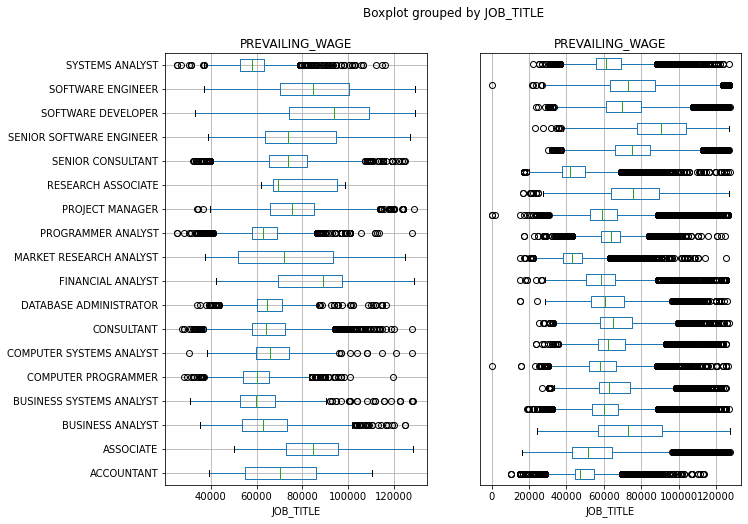

In [46]:
common_jobs=h1b.groupby('JOB_TITLE').EMPLOYER_NAME.count().sort_values(ascending=False).index[0:20]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))


top_20_df_common_jobs=top_20_df[top_20_df.JOB_TITLE.isin(common_jobs)]
top_20_df_common_jobs=top_20_df_common_jobs[top_20_df_common_jobs.PREVAILING_WAGE<=top_20_df_common_jobs.PREVAILING_WAGE.quantile(0.99)]
top_20_df_common_jobs.boxplot(column='PREVAILING_WAGE',by='JOB_TITLE',vert=False,ax=axes[0])
h1b_common_jobs=h1b[h1b.JOB_TITLE.isin(common_jobs)]
h1b_common_jobs=h1b_common_jobs[h1b_common_jobs.PREVAILING_WAGE<=h1b_common_jobs.PREVAILING_WAGE.quantile(0.99)]

h1b_common_jobs.boxplot(column='PREVAILING_WAGE',by='JOB_TITLE',vert=False,ax=axes[1])
plt.yticks([])

Observation

Companies that file H1Bs are paying median if not more prevailing wage for  the 20 most common jobs

# What is the prevailing wage distribution like for the top 20 filers?

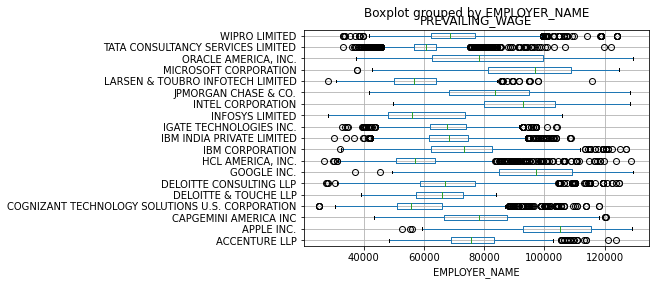

In [47]:
top_20_df_common_jobs.boxplot(column='PREVAILING_WAGE',by='EMPLOYER_NAME',vert=False)

Observation

It can be seen that HCL,L&T,INFOSYS, COGNIZANT salary distribution is definitely lesser than companies like  GOOGLE,MICROSOFT,APPLE and Intel.

# How has the prevailing wage changed over time

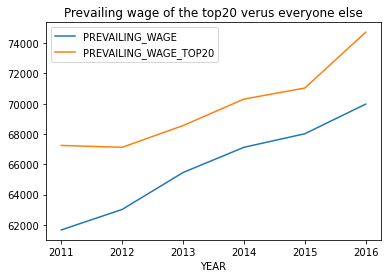

In [48]:
one=h1b.groupby('YEAR').PREVAILING_WAGE.median()
two=top_20_df.groupby('YEAR').PREVAILING_WAGE.median()
one=pd.DataFrame(one)
one['PREVAILING_WAGE_TOP20']=two

one.plot(title='Prevailing wage of the top20 verus everyone else')

Observation

Prevailing wage of the top20 has been higher than all the other H1B filers.Surprisingly in 2015 the wage has increased  rather steeply

In [49]:
job = h1b['JOB_TITLE'].value_counts()
job = job[(job.values > 6000)]

# Different Case-Statuses according to Number of Applicants

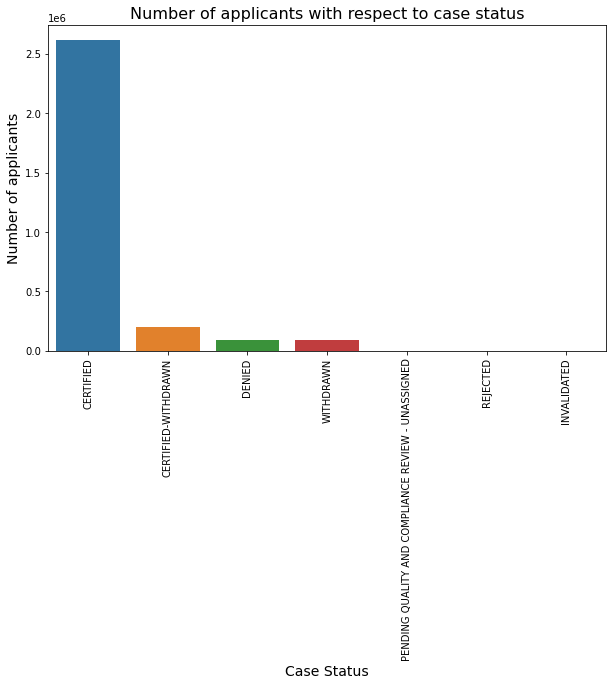

In [50]:
plt.figure(figsize=(10,6))
sns.barplot(status.index, status.values, alpha=1)
plt.xticks(rotation='vertical')
plt.xlabel('Case Status', fontsize=14)
plt.ylabel('Number of applicants', fontsize=14)
plt.title("Number of applicants with respect to case status", fontsize=16)
plt.show()

In [51]:
full = h1b['FULL_TIME_POSITION'].value_counts()

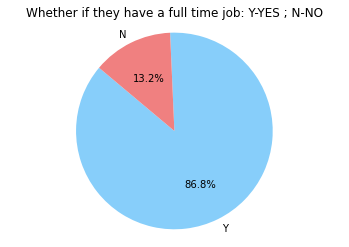

In [52]:
colors = ['lightskyblue', 'lightcoral']
plt.pie(full.values, labels=full.index, colors=colors, autopct='%1.1f%%',startangle=140)
plt.title('Whether if they have a full time job: Y-YES ; N-NO')
plt.axis('equal')
plt.show()

In [53]:
employer = h1b['EMPLOYER_NAME'].value_counts()
employer = employer[(employer.values > 5000)]

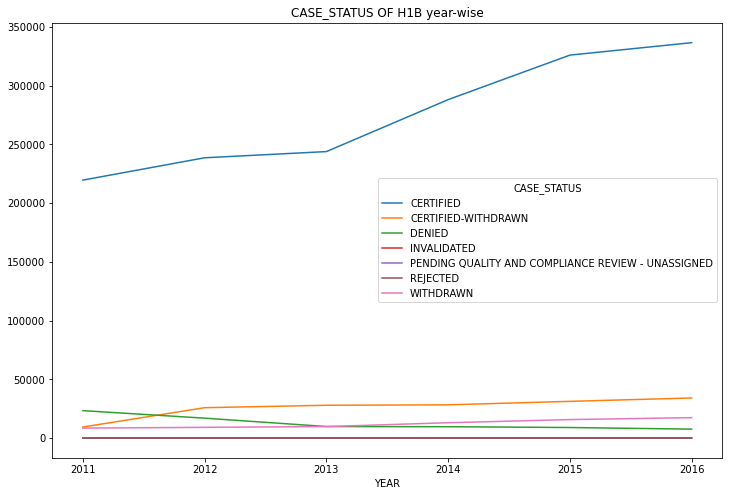

In [54]:
plt.rcParams["figure.figsize"]=(20,10)

pd.crosstab(h1b.YEAR,h1b.CASE_STATUS).plot(kind='line', title='CASE_STATUS OF H1B year-wise', figsize=(12,8))
plt.legend(loc='center right', title='CASE_STATUS')

The above figure conveys that  Certified case status saw an increase from the year 2013.

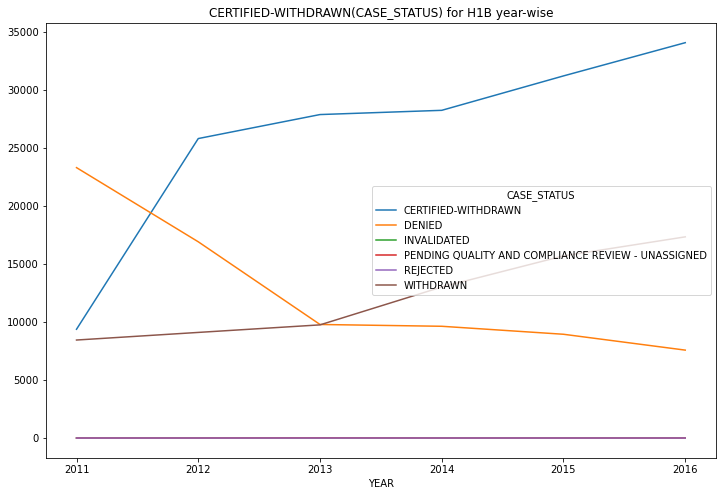

In [55]:
plt.rcParams["figure.figsize"]=(20,10)
h1b_certified_withdrawn=h1b[h1b.CASE_STATUS!='CERTIFIED']
pd.crosstab(h1b_certified_withdrawn.YEAR,h1b_certified_withdrawn.CASE_STATUS).plot(kind='line', title='CERTIFIED-WITHDRAWN(CASE_STATUS) for H1B year-wise', figsize=(12,8))
plt.legend(loc='center right', title='CASE_STATUS')

The above figure conveys that  Certified-Withdrawn cases increased from the year 2012

In [56]:
years = sorted(list((h1b['YEAR'].unique())))
##### Remove the NAN element ####
years.pop()
##### Convert float to integer ####
years = [ int(x) for x in years ]

# Which company had highest number of Applicants?

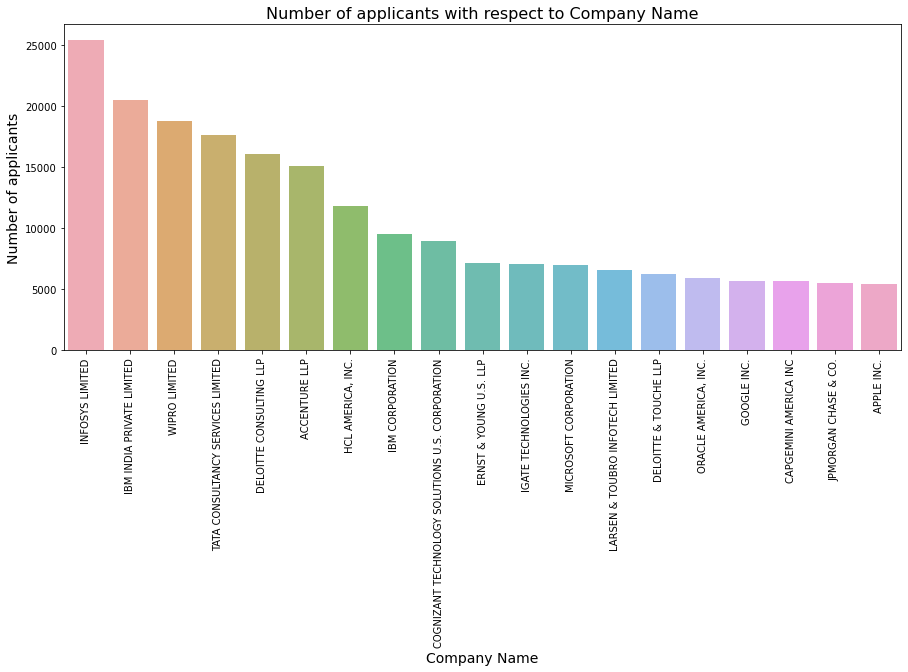

In [57]:
plt.figure(figsize=(15,6))
sns.barplot(employer.index, employer.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('Company Name', fontsize=14)
plt.ylabel('Number of applicants', fontsize=14)
plt.title("Number of applicants with respect to Company Name", fontsize=16)
plt.show()

The above figure conveys that Infosys Limited had the highest amount of H1B applicants during 2011-2016

In [58]:
job = h1b['JOB_TITLE'].value_counts()
job = job[(job.values > 6000)]

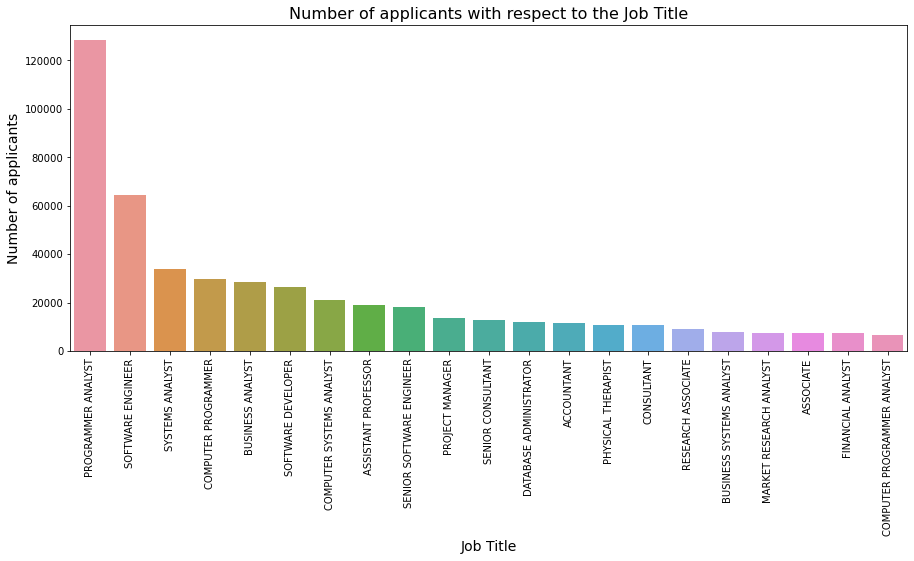

In [59]:
plt.figure(figsize=(15,6))
sns.barplot(job.index, job.values, alpha=1)
plt.xticks(rotation='vertical')
plt.xlabel('Job Title', fontsize=14)
plt.ylabel('Number of applicants', fontsize=14)
plt.title("Number of applicants with respect to the Job Title", fontsize=16)
plt.show()

The above figure conveys that  highest amount of H1B applicants during 2011-2016 were PROGRAMMER ANALYST

# Ratio of Full-Time Jobs Vs Non Full-time Jobs

In [60]:
full = h1b['FULL_TIME_POSITION'].value_counts()

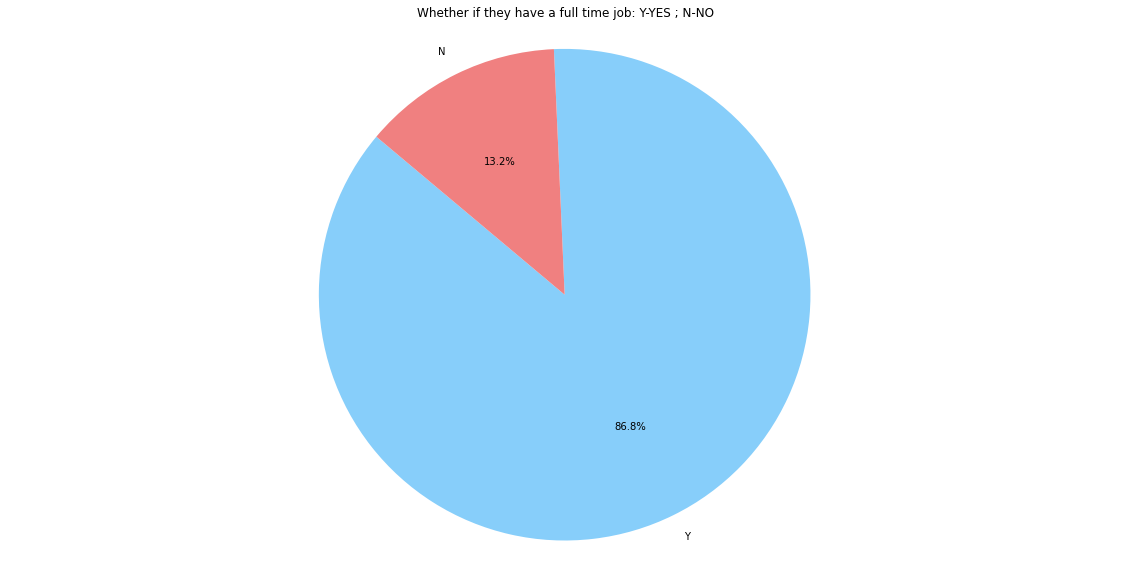

In [61]:
colors = ['lightskyblue', 'lightcoral']
plt.pie(full.values, labels=full.index, colors=colors, autopct='%1.1f%%',startangle=140)
plt.title('Whether if they have a full time job: Y-YES ; N-NO')
plt.axis('equal')
plt.show()

## Prevailing wage: 

In government contracting, a prevailing wage is defined as the hourly wage, usual benefits and overtime, paid to the majority of workers, laborers, and mechanics within a particular area. Prevailing wages are established by regulatory agencies for each trade and occupation employed in the performance of public work, as well as by State Departments of Labor or their equivalents.

The H-1B visa program requires employers to “pay the prevailing wage or the actual wage paid by the employer to workers with similar skills and qualifications, whichever is higher”


## Average PREVAILING_WAGE 

In [62]:
np.mean(h1b['PREVAILING_WAGE'])

178370.01889188334

Mean Prevailing wage is about 180 thousand dollars

# Prevailing Wage Year-Wise

In [63]:
wage = (h1b.groupby('YEAR').sum())['PREVAILING_WAGE']

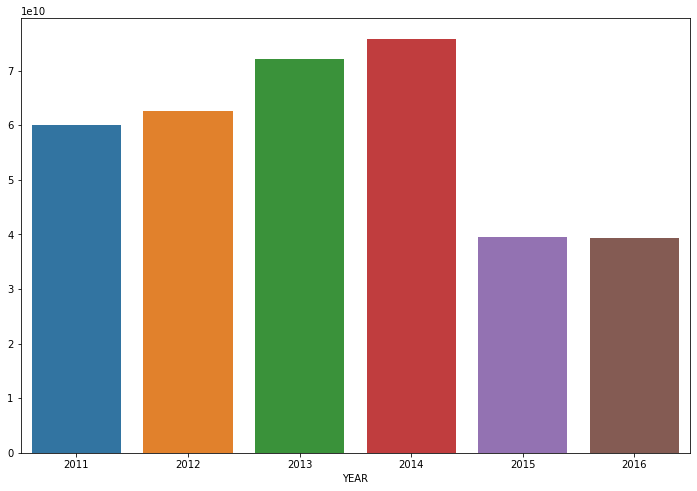

In [64]:
plt.figure(figsize=(12,8))
sns.barplot(x=wage.index,y=wage.values)
plt.show()

The above plot conveys that Prevailing wage was highest in the year 2014

In [65]:
work = h1b['WORKSITE'].value_counts()
place = work[(work.values>10000)]

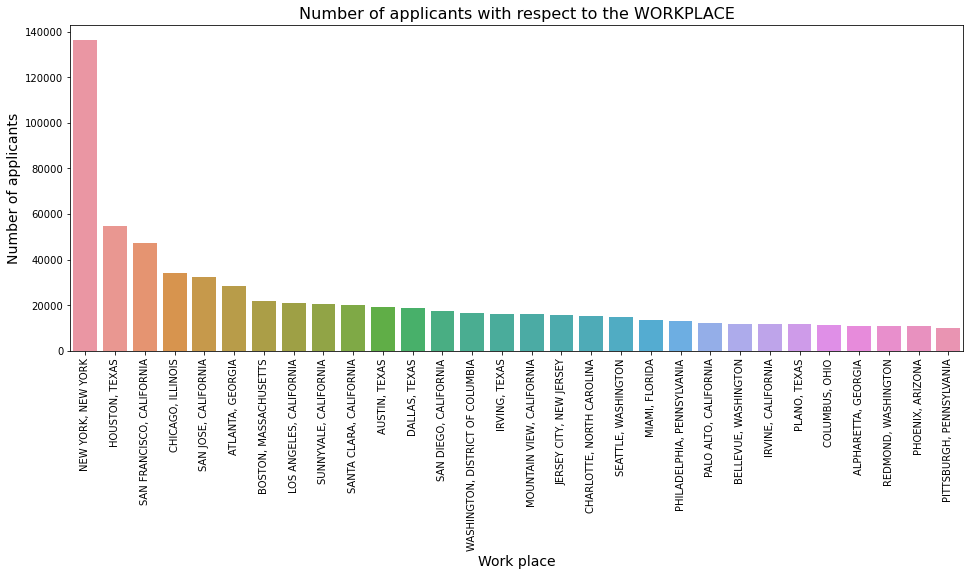

In [66]:
plt.figure(figsize=(16,6))
sns.barplot(place.index, place.values, alpha=1)
plt.xticks(rotation='vertical')
plt.xlabel('Work place', fontsize=14)
plt.ylabel('Number of applicants', fontsize=14)
plt.title("Number of applicants with respect to the WORKPLACE", fontsize=16)
plt.show()

## New York is the major destination workplace in USA

# TOP 10 jobs  and their Average Salaries

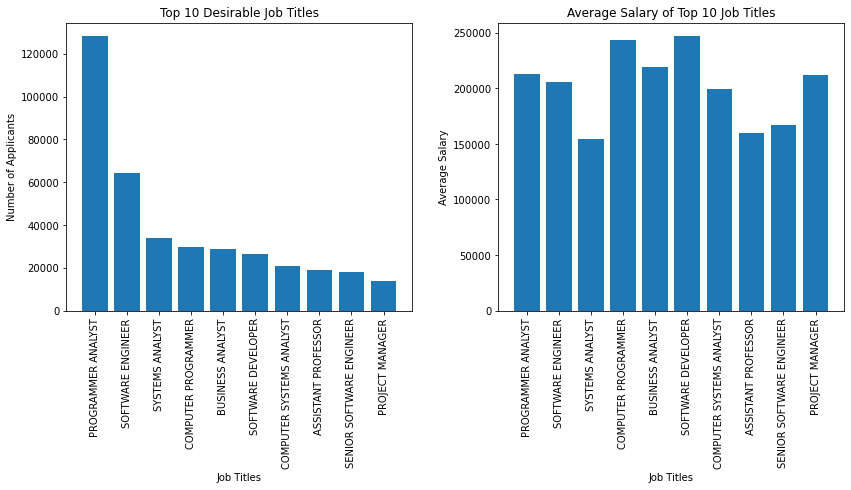

In [67]:
# Top 10 desirable job titles.

fig = plt.figure(figsize=(12,10))
ax1 = fig.add_axes([0,0,.4,.4])
ax2 = fig.add_axes([.5,0,.4,.4])
job_title = h1b['JOB_TITLE'].value_counts()[:10]

ax1.bar(x=job_title.index, height=job_title[:])
ax1.set_xticklabels(labels=job_title.index , rotation=90)
ax1.set_title('Top 10 Desirable Job Titles')
ax1.set_xlabel('Job Titles')
ax1.set_ylabel('Number of Applicants')

# Average Salary of top 10 desirable Job Title.

job_title_avg = []
for i in job_title.index:
    avg = h1b[h1b['JOB_TITLE']==i]['PREVAILING_WAGE'].mean()
    job_title_avg.append(avg)
    
ax2.bar(x=job_title.index, height=job_title_avg)  
ax2.set_xticklabels(labels=job_title.index, rotation=90)
ax2.set_title('Average Salary of Top 10 Job Titles')
ax2.set_xlabel('Job Titles')
ax2.set_ylabel('Average Salary')
plt.show()

#### The conclusions from the figures:-
* As from the figure-1 we can say that the number of applicants are increasing year over year from 2011 to 2016.
* As the number of applications are approximately double in 2016 as compare to 2011.
* It indicates that Foriegner loves to work in America as compare to previous year.
* From figure-2 one can say that the growth is tremendous after 2014 and specially in 2016 which gives us approximately 
  80% growth

#  Analysis of  the number of applications year wise and applicants growth rate per year.

Text(0, 0.5, 'Number of Applications')

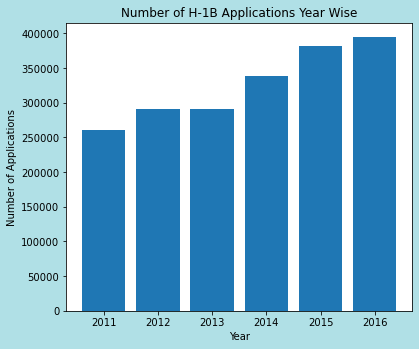

In [68]:
# Number of applications per year.

fig = plt.figure(figsize=(12,10), facecolor='#B0E0E6')
ax1 = fig.add_axes([0,0,.4,.4])

year = h1b['YEAR'].value_counts()   # counting number of applicants in each year.
ax1.bar(x=year.index, height=year[:])
ax1.set_title('Number of H-1B Applications Year Wise')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Applications')



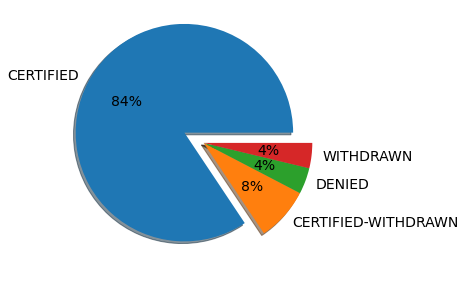

In [69]:
# Analysing the case status and Ploting the result for 2011-2016.

status = h1b['CASE_STATUS'].value_counts()

plt.figure(figsize=(10,5))
plt.pie(labels=status.index[:-3], x=status[:-3], explode=[0.2,0,0,0], autopct='%.f%%', shadow=True, textprops={'fontsize':14})
plt.show()

#### The conclusions from the Figure:-
* We can say that the one who apply for the H-1B visa, gets its visa. As 84% get it certified.
* It is easy to get H-1B certification, we can say from the data.

### Q5). Comparision between the average salary of top 10 companies who are in demand AND top 10 companies who are paying highest salary.

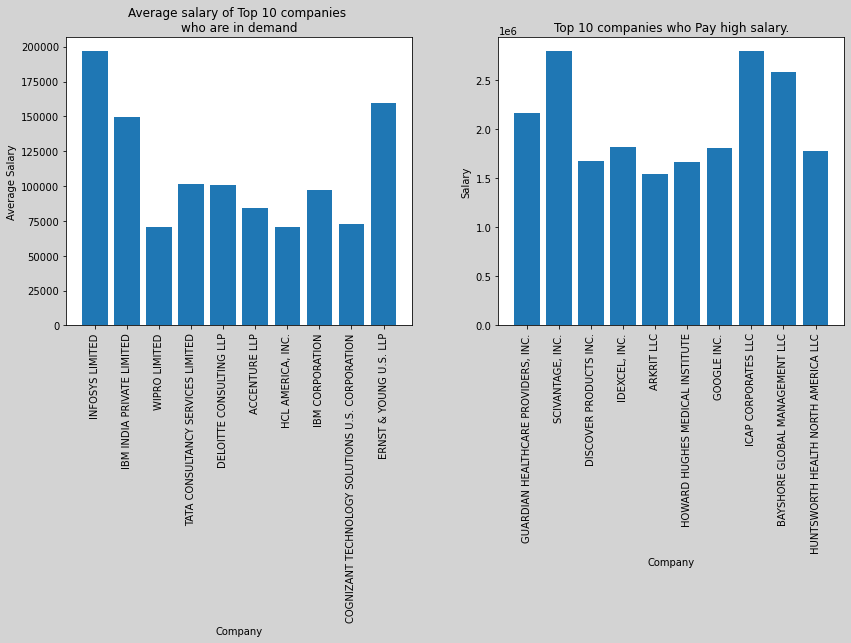

In [70]:
# Average salary of top 10 companies who are in demand.

company_demand = h1b['EMPLOYER_NAME'].value_counts()[:10]

company_demand_avg = []
for var in company_demand.index:
    avg = h1b[h1b['EMPLOYER_NAME']==var]['PREVAILING_WAGE'].mean()
    company_demand_avg.append(avg)
fig = plt.figure(figsize=(12,10), facecolor='#D3D3D3')
ax1 = fig.add_axes([0,0,.4,.4])

ax1.bar(x=company_demand.index, height=company_demand_avg[:])
ax1.set_xticklabels(labels=company_demand.index, rotation=90)
ax1.set_title("""Average salary of Top 10 companies 
who are in demand""")
ax1.set_xlabel('Company')
ax1.set_ylabel('Average Salary')

# Top 10 companies who are paying highest salary

company_highsalary = h1b.sort_values(by='PREVAILING_WAGE', ascending=False)['EMPLOYER_NAME'][:10]

ax2 = fig.add_axes([.5,0,.4,.4])
ax2.bar(x=company_highsalary.values, height=company_highsalary.index)

ax2.set_xticklabels(labels=company_highsalary.values, rotation=90)
ax2.set_title('Top 10 companies who Pay high salary.')
ax2.set_xlabel('Company')
ax2.set_ylabel('Salary')

plt.show()

# Q6). Out of all states which 10 states are more desirable  state by employees?
### Which top 5 states have denied most?
### And we have to find out, is there any correlation between these two results.

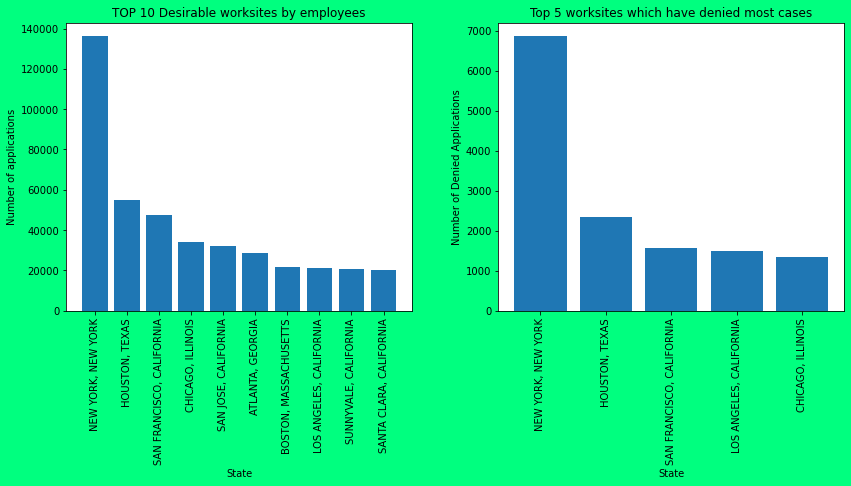


The Correlation Between these two results is-->>	 0.9792244749867205


In [71]:
# Top 10 desirable states by employees.

state = h1b['WORKSITE'].value_counts()[:10]

fig =plt.figure(figsize=(12,10), facecolor='#00FF7F')
ax1 = fig.add_axes([0,0,.4,.4])
ax1.bar(x=state.index, height=state.values)
ax1.set_xticklabels(labels=state.index, rotation=90)
ax1.set_title('TOP 10 Desirable worksites by employees')
ax1.set_xlabel('State')
ax1.set_ylabel('Number of applications')

# Top 5 states which have denied most?

denied_states = h1b[h1b['CASE_STATUS']=='DENIED']['WORKSITE'].value_counts()[:5]

ax2 = fig.add_axes([.5,0,.4,.4])
ax2.bar(x=denied_states.index, height=denied_states.values)
ax2.set_xticklabels(labels=denied_states.index, rotation=90)
ax2.set_title('Top 5 worksites which have denied most cases')
ax2.set_xlabel('State')
ax2.set_ylabel('Number of Denied Applications')

plt.show()
print()
print(f'The Correlation Between these two results is-->>\t {state.corr(denied_states)}')

#### The conclusions from the figures:-
* Top 5 Desirable states by employees are also the top 5 states which have denied most.
* The states which are in demands , also denied the most.
* As wew can see the correlation between the above two results is 0.99, which indicates that they are highly correlated with each other. They are directly proportional to each other.

# Q7). Ratio of Full time and Half time position.

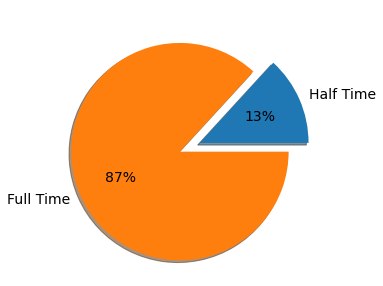

In [72]:
# Ratio of Full Time and Half Time Position.

position = h1b.groupby('FULL_TIME_POSITION')['CASE_STATUS']
#print(position.count())
total = position.count()[0] + position.count()[1]
#print(total)
l = ['Half Time', 'Full Time']
l1 = [(position.count()[0]/total), (position.count()[1]/total)]
plt.figure(figsize=(10,5), )
plt.pie(labels=l, x=l1, autopct='%.f%%', explode=[0,0.2], shadow=True,textprops={'fontsize':14})
plt.show()

#### The conclusions from the figure:-
* 86% employees are in Full time position and only 14% are in Half time position.
* Foreigners like to work as a full time position in America. And it is also obvious as they are in America to earn money.

### Q8). How many applicants applied for Data Science job profile? Data Science job profile includes Job Titles like Data Scientist, Data Analyst, Data Engineer, Machine Learning Engineer, Business Analyst.

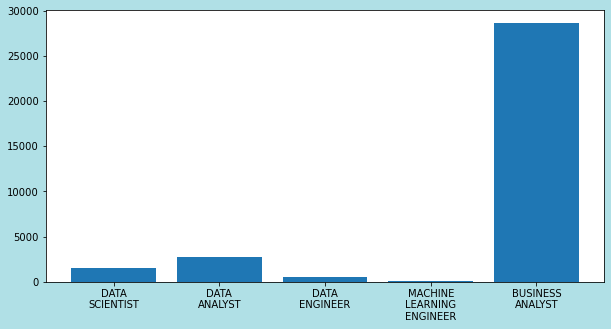


The total number of jobs related to Data Science job profile are-->>	 33547


In [73]:
# Data science job profile includes job titles like Data Scientist, Data Analyst, Data Engineer, Machine Leaning Engineer,
# Business Analyst.
# Let's check out the total job created under these job titles.

jobs = ['DATA SCIENTIST', 'DATA ANALYST', 'DATA ENGINEER', 'MACHINE LEARNING ENGINEER', 'BUSINESS ANALYST']
count = []
# Counting the number of applicants related to each job title.
for var in jobs:
    q = h1b[h1b['JOB_TITLE']==var]['JOB_TITLE'].count()
    count.append(q)

job1 = ['DATA\nSCIENTIST', 'DATA\nANALYST', 'DATA\nENGINEER', 'MACHINE\nLEARNING\nENGINEER', 'BUSINESS\nANALYST']    
plt.figure(figsize=(10,5), facecolor='#B0E0E6')
plt.bar(x=job1, height=count)
plt.show()
print()
print(f"The total number of jobs related to Data Science job profile are-->>\t {sum(count)}")

#### The conclusions from the figure:->
* There are 46056 jobs are available for Data Science job profile.
* As many jobs related to Data sciecne job profile are there in America, so many foriegner are appling for it. 

### Q9). Analysis the growth of total job titles related to data science job profile over Years.

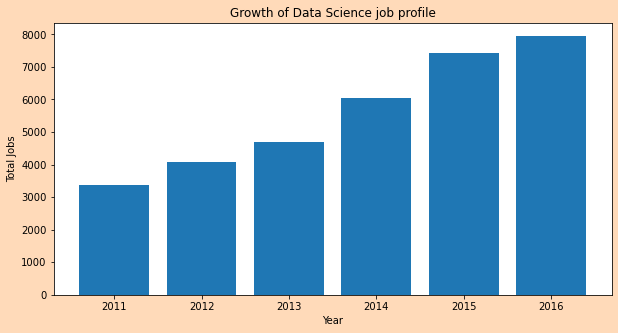

In [74]:
# Let's calculate total jobs of all job titles related to data sciene job profile over Years.

jobs = ['DATA SCIENTIST', 'DATA ANALYST', 'DATA ENGINEER', 'MACHINE LEARNING ENGINEER', 'BUSINESS ANALYST']
total = []
# Counting number of applicants in each year for each job title.

for i in jobs:
    w = h1b[h1b['JOB_TITLE']==i].groupby('YEAR')['CASE_STATUS'].count()
    total.append(list(w.values))

total = np.array(total)

ds_total = []
# Adding all the jobs related to job profile Data Science according to year wise.

for j in range(6):
    ds_total.append(sum(total[:, j]))    
year = [2011,2012,2013,2014,2015,2016]

plt.figure(figsize=(10,5),facecolor='#FFDAB9')
plt.bar(x=year, height=ds_total)
plt.title('Growth of Data Science job profile')
plt.xlabel('Year')
plt.ylabel('Total Jobs')
plt.show()

#### The conclusions from the figure:-
* The Jobs related to Data science are increasing over the years.
* The jobs in 2016 are more then the double as compare to 2011.
* Jobs related to Data science are in demand.
* In future there is high probability that jobs related to Data science profile will increase.
* It also indicates the increase in volume of Data over years.

# Q10). Analysis on the average salary of job titles related to Data Science.

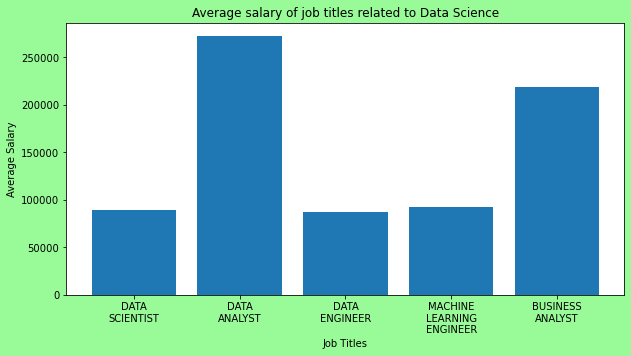

In [75]:
# Average salary of job titles related to Data Science.

jobs = ['DATA SCIENTIST', 'DATA ANALYST', 'DATA ENGINEER', 'MACHINE LEARNING ENGINEER', 'BUSINESS ANALYST']
jobs_avg = []
for i in jobs:
    avg = h1b[h1b['JOB_TITLE']==i]['PREVAILING_WAGE'].mean()
    jobs_avg.append(avg)

jobs1 = ['DATA\nSCIENTIST', 'DATA\nANALYST', 'DATA\nENGINEER', 'MACHINE\nLEARNING\nENGINEER', 'BUSINESS\nANALYST']
plt.figure(figsize=(10,5), facecolor='palegreen')
plt.bar(x=jobs1, height=jobs_avg)
plt.title('Average salary of job titles related to Data Science')
plt.xlabel('Job Titles')
plt.ylabel('Average Salary')
plt.show()


#### The conclusions from figure:-
* Average salary is very good and high.
* Data Analyst are getting highest among all.

# Q11). Analysis of  Top 10 company where Data Analyst applied the most.

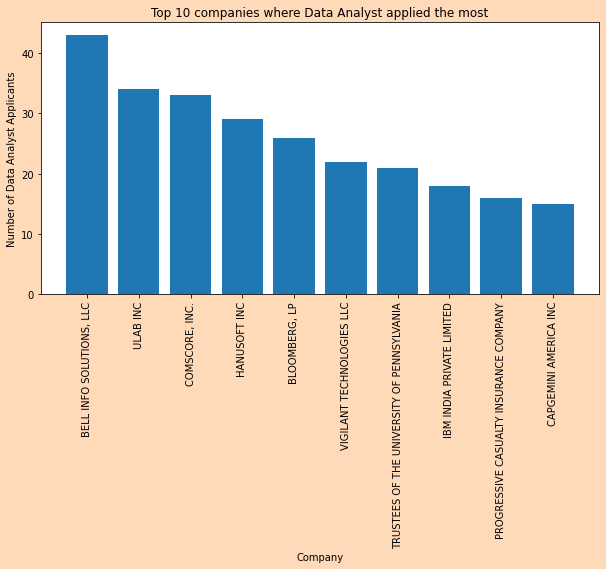

In [76]:
# Analysis of Top 10 company where Data Analyst applied the most.

company = h1b[h1b['JOB_TITLE']=='DATA ANALYST']['EMPLOYER_NAME'].value_counts()[:10]

plt.figure(figsize=(10,5), facecolor='#FFDAB9')
plt.bar(x=company.index, height=company.values)
plt.title('Top 10 companies where Data Analyst applied the most')
plt.xlabel('Company')
plt.ylabel('Number of Data Analyst Applicants')
plt.xticks(rotation=90)
plt.show()

In [77]:
### Q12). Analysis of Top 10 Favourite Worksite of Data Analyst.

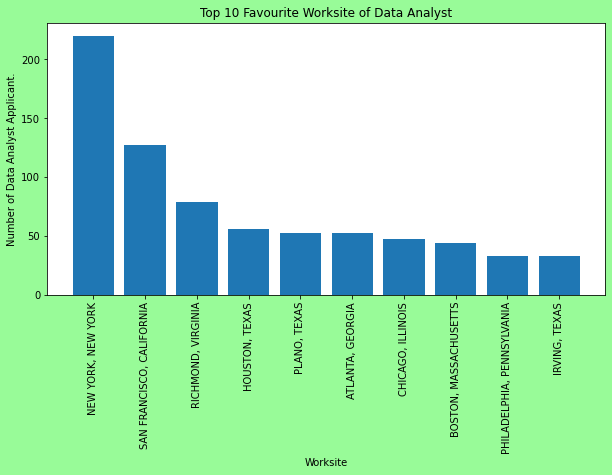

In [78]:
# Top 10 Favourite Worksite of Data Analyst.

worksite = h1b[h1b['JOB_TITLE']=='DATA ANALYST']['WORKSITE'].value_counts()[:10]

plt.figure(figsize=(10,5), facecolor='palegreen')
plt.bar(x=worksite.index, height=worksite.values)
plt.xticks(rotation=90)
plt.title('Top 10 Favourite Worksite of Data Analyst')
plt.xlabel('Worksite')
plt.ylabel('Number of Data Analyst Applicant.')
plt.show()

#### The conclusions from figure:-
* Georgia, New York, Virginia, California they are favourite of Data Analyst.
* All the 4 states are at a good distance from each other.

In [79]:
topEmp = list(h1b['EMPLOYER_NAME'][h1b['YEAR'] >= 2015.0].groupby(h1b['EMPLOYER_NAME']).count().sort_values(ascending=False).head(10).index)
byEmpYear = h1b[['EMPLOYER_NAME', 'YEAR', 'PREVAILING_WAGE']][h1b['EMPLOYER_NAME'].isin(topEmp)]
byEmpYear = byEmpYear.groupby([h1b['EMPLOYER_NAME'],h1b['YEAR']])

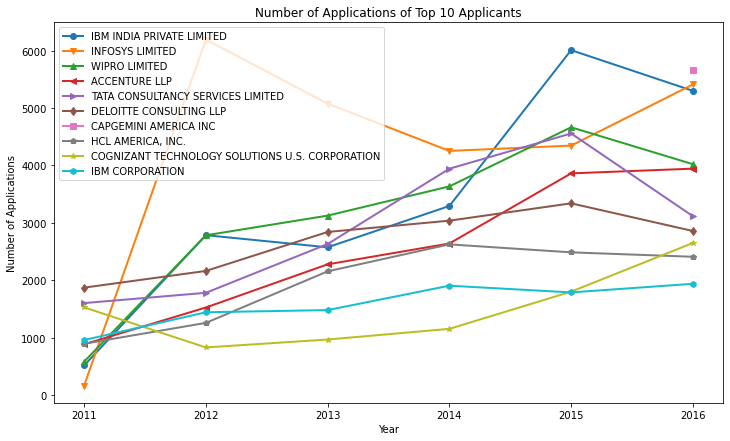

In [80]:
markers=['o','v','^','<','>','d','s','p','*','h','x','D','o','v','^','<','>','d','s','p','*','h','x','D']
fig = plt.figure(figsize=(12,7))
for company in topEmp:
    tmp = byEmpYear.count().loc[company]
    plt.plot(tmp.index.values, tmp["PREVAILING_WAGE"].values, label=company, linewidth=2,marker=markers[topEmp.index(company)])
plt.xlabel("Year")
plt.ylabel("Number of Applications")
plt.legend()
plt.title('Number of Applications of Top 10 Applicants')
plt.show()

We can see clearly from the figure that there are 2 new big players: CAPGEMINI AMERICA and TECH MAHINDRA.
From this plot we can draw some interesting points:
    - INFOSYS and IBM India shows a very rapid development, especially during period from 2011 to 2013, where it came from about zero to 32k applications!
    - TATA also shows a significant development.
    - Except for 2 new companies , we can see that all top EMPLOYERS have peaks of numbers of applications in the year of 2015 and the trend is decreasing in year 2016. There could be a social or political event relating to this trend during that time!

Those are companies who filed the most numbers of applications. 

# What about their payments? Certainly, it depends on the specific job, but it is also informative to have a look at the average salary from each company.

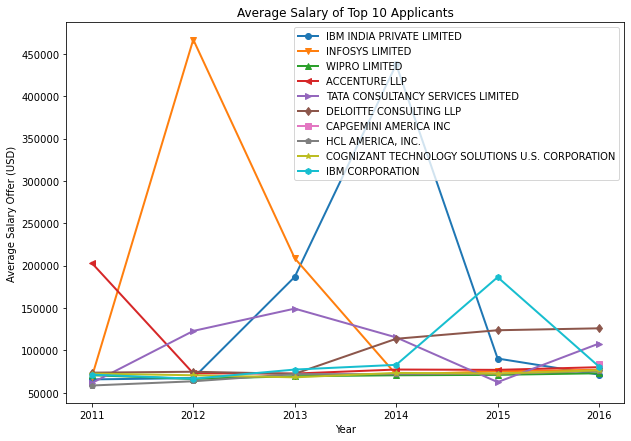

In [81]:
fig = plt.figure(figsize=(10,7))
for company in topEmp:
    tmp = byEmpYear.mean().loc[company]
    plt.plot(tmp.index.values, tmp["PREVAILING_WAGE"].values, label=company, linewidth=2,  marker=markers[topEmp.index(company)])

plt.xlabel("Year")
plt.ylabel("Average Salary Offer (USD)")
plt.legend()
plt.title("Average Salary of Top 10 Applicants")
plt.show()

It is very interesting to see a huge peak in 2014 from "IBM INDIA PRIVATE LIMITED", looking like something going wrong. The other suspicious peaks are from INFOSIS at 2012, ACCENTURE and WIPRO at 2011 and TECH MAHINDRA at 2016. We need to further analyze these peaks.
We will see clearly below that there are some outliers (salary of billion dollars per year!) causing these weird behaviors. This outliers are very likely coming from the unit conversions (between salary rate per hours, day, week or month to per year) when the data were collected and converted.
The numbers of outliers are very small in comparison to the number of entries for corresponding EMPLOYERS for each year, so I will remove these outliers. It should be safe to consider the salary higher than half a milion as outliers. There certainly jobs such as CEO having this kind of on the sky high salary. But they are not good representatives for the distribution since we have small number of entries, typically in order of 10000, for each EMPLOYER, therefor few extreme outliers can skew the distribution quite a lot.
Note: The above analyses about the number of applications with time are still valid. They are independent with the errors on converting salary from different unit to a common one of USD per year.
Bellow are example of outliers from "IBM INDIA PRIVATE LIMITED" and "ACCENTURE LLP":

In [82]:
for company in ['IBM INDIA PRIVATE LIMITED','ACCENTURE LLP']:
    print(h1b[['EMPLOYER_NAME','PREVAILING_WAGE','YEAR']][h1b['EMPLOYER_NAME']==company].sort_values(['PREVAILING_WAGE'], ascending=False).head(15))

                     EMPLOYER_NAME  PREVAILING_WAGE  YEAR
2178403  IBM INDIA PRIVATE LIMITED   174,397,600.00  2013
1641840  IBM INDIA PRIVATE LIMITED   165,355,840.00  2014
1635417  IBM INDIA PRIVATE LIMITED   165,355,840.00  2014
1347034  IBM INDIA PRIVATE LIMITED   153,674,560.00  2014
1404957  IBM INDIA PRIVATE LIMITED   152,116,640.00  2014
1364952  IBM INDIA PRIVATE LIMITED   152,116,640.00  2014
1293965  IBM INDIA PRIVATE LIMITED   146,577,600.00  2014
1340891  IBM INDIA PRIVATE LIMITED   142,598,560.00  2014
1875621  IBM INDIA PRIVATE LIMITED   132,907,840.00  2013
909650   IBM INDIA PRIVATE LIMITED   128,494,080.00  2015
1341621  IBM INDIA PRIVATE LIMITED   126,418,240.00  2014
1314545  IBM INDIA PRIVATE LIMITED     5,846,900.00  2014
1340867  IBM INDIA PRIVATE LIMITED     3,514,108.00  2014
1341609  IBM INDIA PRIVATE LIMITED     3,514,108.00  2014
276967   IBM INDIA PRIVATE LIMITED     3,277,248.00  2016
         EMPLOYER_NAME  PREVAILING_WAGE  YEAR
2912000  ACCENTURE LLP   1

In [83]:
h1bdat = h1b[h1b['PREVAILING_WAGE'] <= 500000]
byEmpYear = h1bdat[['EMPLOYER_NAME', 'YEAR', 'PREVAILING_WAGE']][h1bdat['EMPLOYER_NAME'].isin(topEmp)]
byEmpYear = byEmpYear.groupby([h1bdat['EMPLOYER_NAME'],h1bdat['YEAR']])

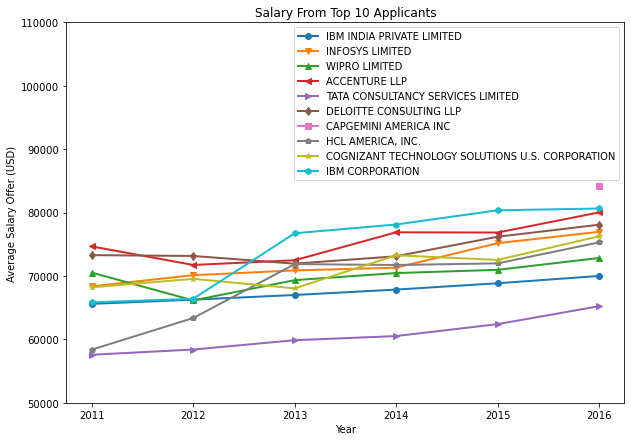

In [84]:
fig = plt.figure(figsize=(10,7))
for company in topEmp:
    tmp = byEmpYear.mean().loc[company]
    plt.plot(tmp.index.values, tmp["PREVAILING_WAGE"].values, label=company, linewidth=2,  marker=markers[topEmp.index(company)])
        
plt.ylim(50000,110000)
plt.xlabel("Year")
plt.ylabel("Average Salary Offer (USD)")
plt.legend()
plt.title("Salary From Top 10 Applicants")
plt.show()

 The plot siginifies 2 points:

 1. TATA had the 2nd biggest applicant but they has lowest offering salary among top 10 big applicants. From which we can conclude that larger size of company does not warranty better salary.
 2. CAPGEMINI AMERICA looks very impressive. It shows both very high amount of applications and salary.

# Who are the main players?

Top 10 Applicants in term of the numbers of applications in 2011, in 2016 and from 2011 to 2016

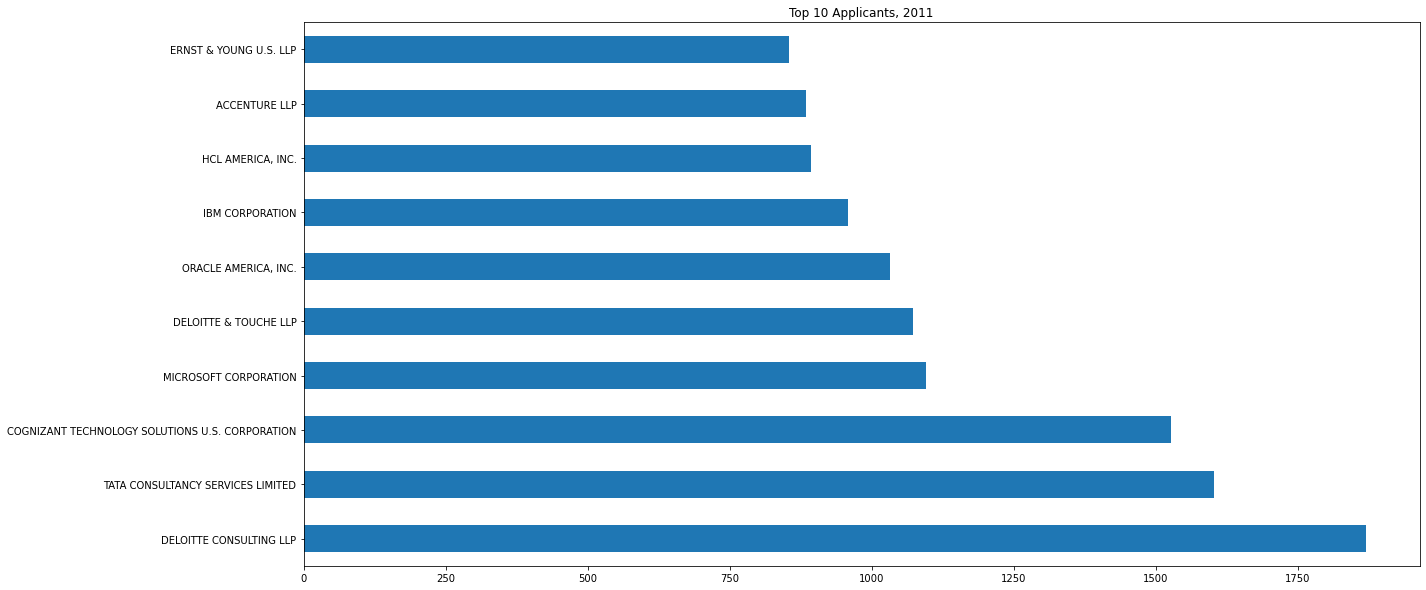

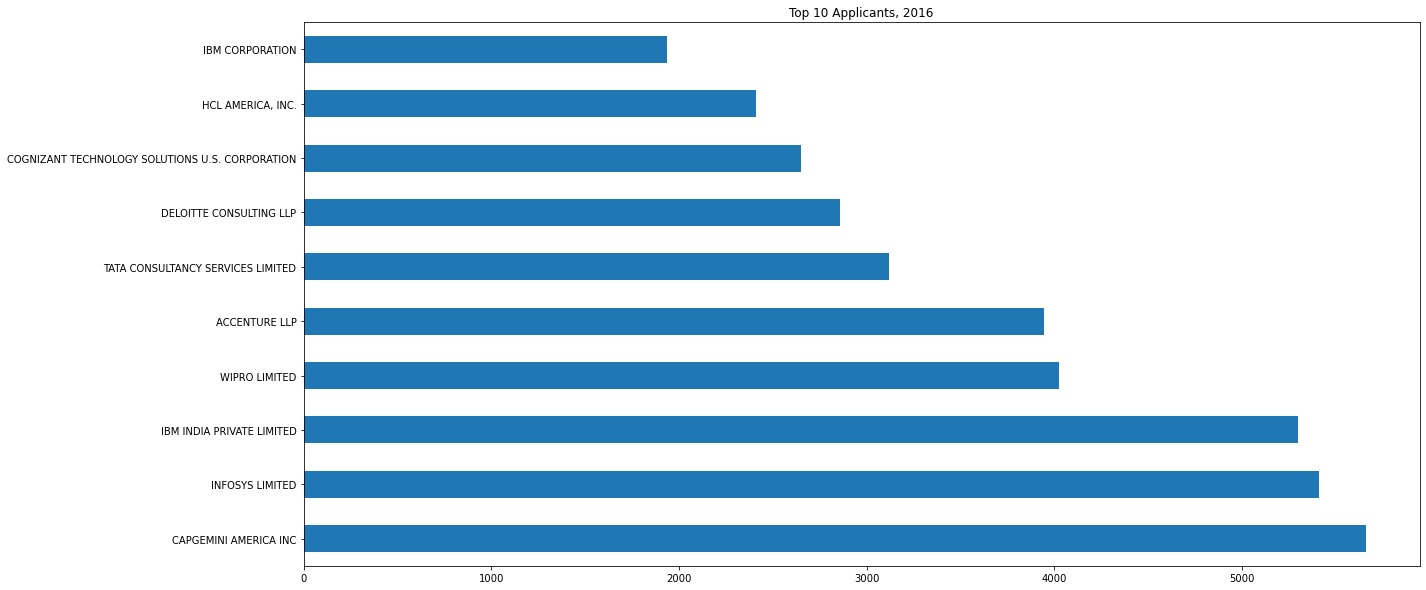

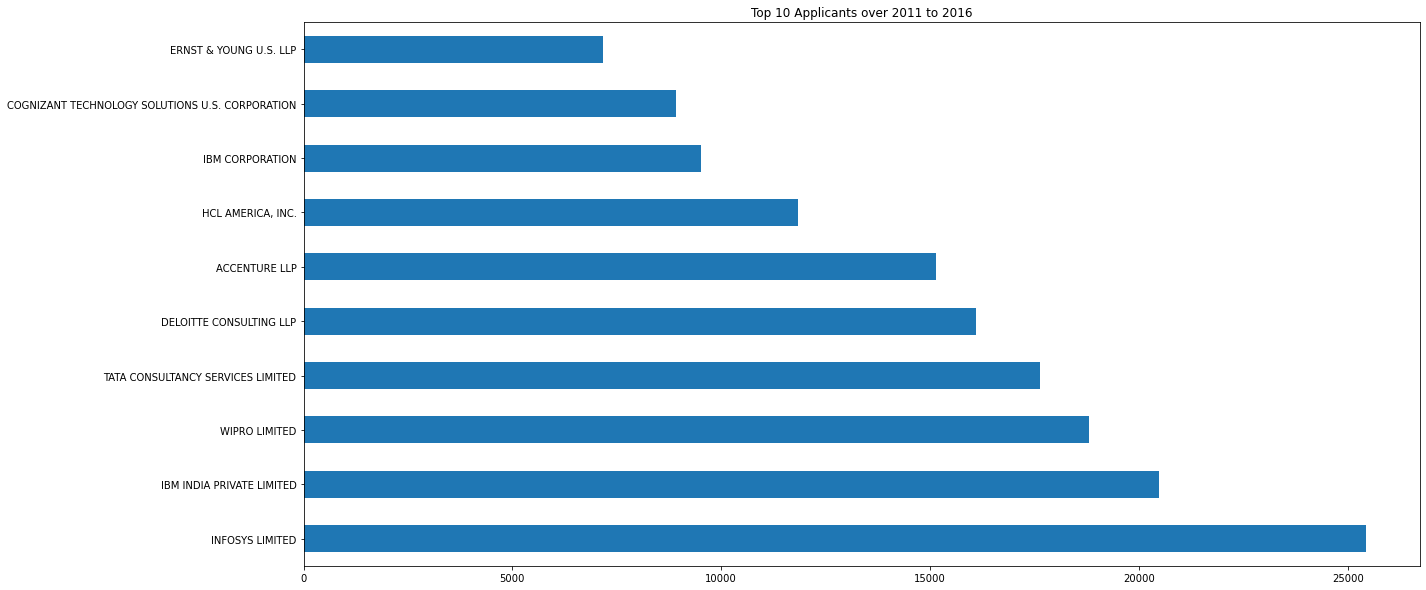

In [85]:
ax1 = h1b['EMPLOYER_NAME'][h1b['YEAR'] == 2011].groupby(h1b['EMPLOYER_NAME']).count().sort_values(ascending=False).head(10).plot(kind='barh', title="Top 10 Applicants, 2011")
ax1.set_ylabel("")
plt.show()
ax2 = h1b['EMPLOYER_NAME'][h1b['YEAR'] == 2016.0].groupby(h1b['EMPLOYER_NAME']).count().sort_values(ascending=False).head(10).plot(kind='barh', title="Top 10 Applicants, 2016")
ax2.set_ylabel("")
plt.show()
ax3 = h1b['EMPLOYER_NAME'].groupby([h1b['EMPLOYER_NAME']]).count().sort_values(ascending=False).head(10).plot(kind='barh', title="Top 10 Applicants over 2011 to 2016")
ax3.set_ylabel("")
plt.show()

# What are the most popular jobs and their corresponding salary those top 10 companies hiring during 2011-2016?

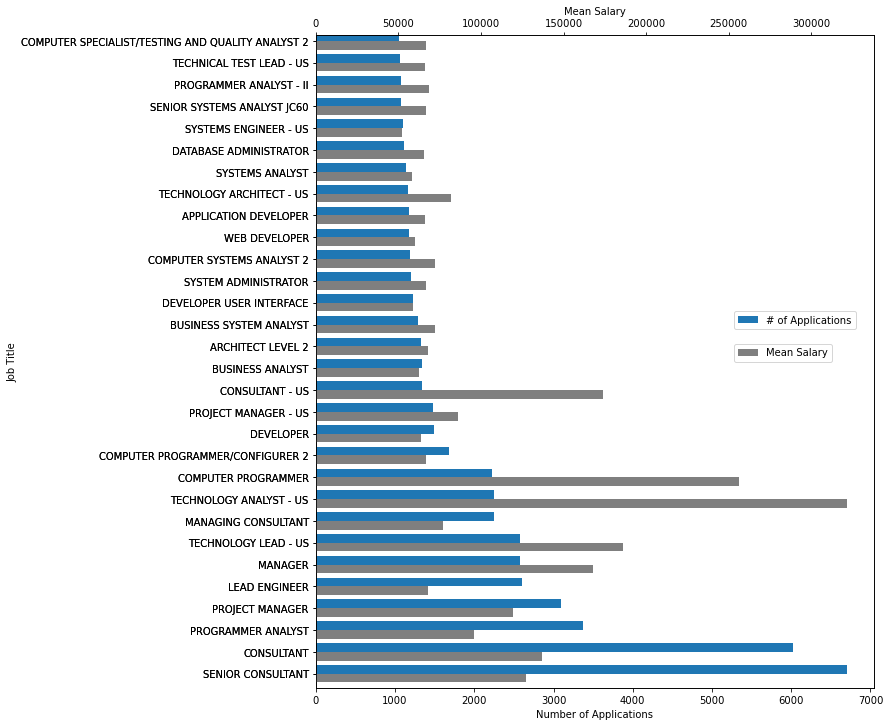

In [86]:
PopJobs = h1b[['JOB_TITLE', 'EMPLOYER_NAME', 'PREVAILING_WAGE']][h1b['EMPLOYER_NAME'].isin(topEmp)].groupby(['JOB_TITLE'])
topJobs = list(PopJobs.count().sort_values(by='EMPLOYER_NAME', ascending=False).head(30).index)
df = PopJobs.count().loc[topJobs].assign(mean_wage=PopJobs.mean().loc[topJobs])
fig = plt.figure(figsize=(10,12))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
width = 0.35
df.EMPLOYER_NAME.plot(kind='barh', ax=ax1, color='C0', width=0.4, position=0, label='# of Applications')
df.mean_wage.plot(kind='barh', ax=ax2, color='C7', width=0.4, position=1, label='Mean Salary')
ax1.set_xlabel('Number of Applications')
ax1.set_ylabel('')
ax1.legend(loc=(0.75,0.55))
ax2.set_xlabel('Mean Salary')
ax2.set_ylabel('Job Title')
ax2.legend(loc=(0.75,0.50))
plt.show()

#  popular jobs in the market during 2016



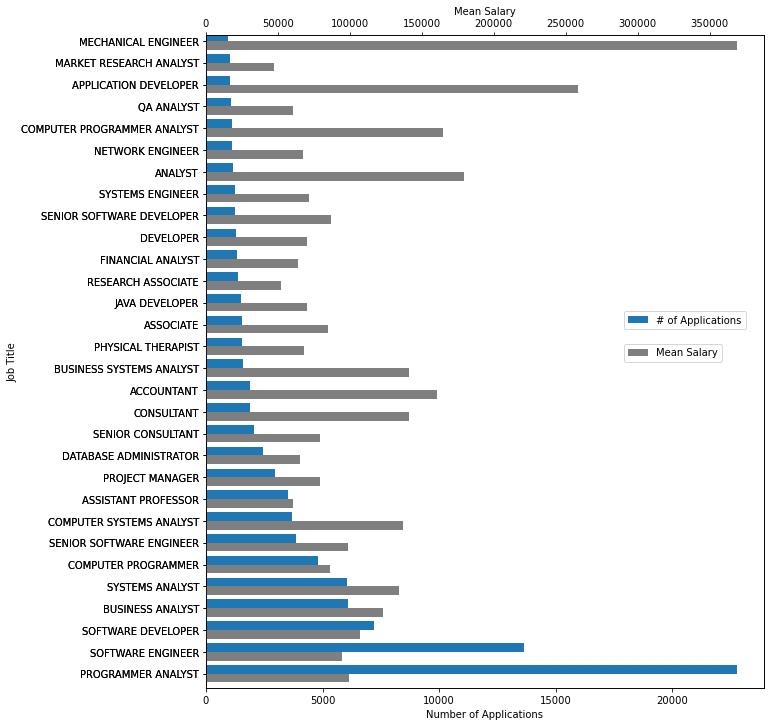

In [87]:
PopJobs2016 = h1b[['JOB_TITLE', 'EMPLOYER_NAME', 'PREVAILING_WAGE','YEAR']]
PopJobs2016 = PopJobs2016[PopJobs2016['YEAR']==2016].groupby(['JOB_TITLE'])
topJobs2016 = list(PopJobs2016.count().sort_values(by='EMPLOYER_NAME', ascending=False).head(30).index)
df2016 = PopJobs2016.count().loc[topJobs2016].assign(mean_wage=PopJobs2016.mean().loc[topJobs2016]['PREVAILING_WAGE'])
fig = plt.figure(figsize=(10,12))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
width = 0.35
df2016.EMPLOYER_NAME.plot(kind='barh', ax=ax1, color='C0', width=0.4, position=0, label='# of Applications')
df2016.mean_wage.plot(kind='barh', ax=ax2, color='C7', width=0.4, position=1, label='Mean Salary')
ax1.set_xlabel('Number of Applications')
ax1.set_ylabel('')
ax1.legend(loc=(0.75,0.55))
ax2.set_xlabel('Mean Salary')
ax2.set_ylabel('Job Title')
ax2.legend(loc=(0.75,0.50))
plt.show()

Top jobs from top 10 applications are mostly IT jobs. The most paid job titles were  "Computer Programmer" and "Technology Analyst" and on the other side, Job Titles like Senior Consultant and Consultant  had highest job applications  during 2011-2016

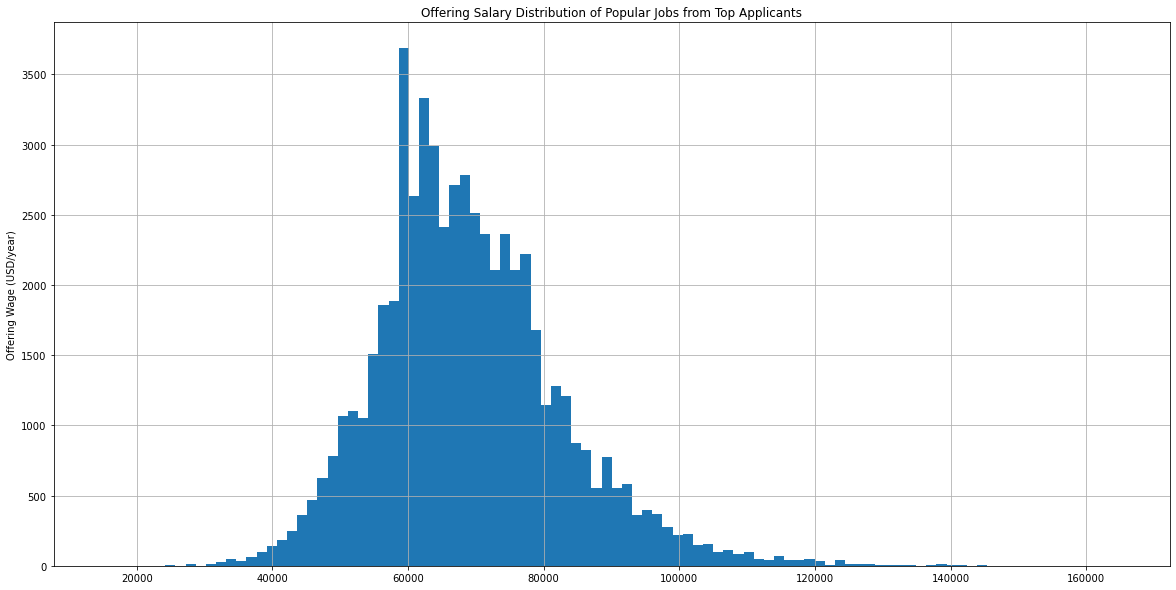

In [88]:
ax = h1bdat[['JOB_TITLE', 'EMPLOYER_NAME', 'PREVAILING_WAGE']][h1bdat['EMPLOYER_NAME'].isin(topEmp)  & h1bdat['JOB_TITLE'].isin(topJobs)]['PREVAILING_WAGE'].hist(bins=100)
ax.set_ylabel('Offering Wage (USD/year)')
plt.title('Offering Salary Distribution of Popular Jobs from Top Applicants')
plt.show()

# Data Scientist Job: Analysis and Prediction
Since Data Scientist job is hot, so let do some analysis and prediction on the number of Data Scientist jobs. The regression will be used, where the feature is a power function of year.
From figure bellow we can see that the number of Data scientist job is increasing rapidly (power of 2.32) and we expect to have about 1.5k and 2.1k Data Scientist jobs in 2017 and 2018.

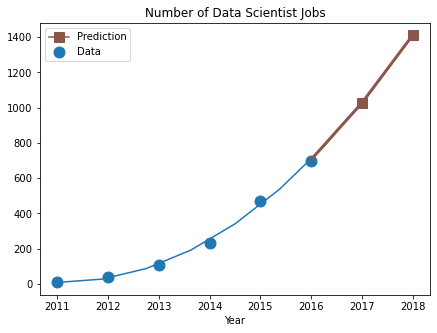

In [89]:
dsj = h1b[['JOB_TITLE','YEAR']][h1b['JOB_TITLE'] == "DATA SCIENTIST"].groupby('YEAR').count()['JOB_TITLE']
X = np.array(dsj.index)
Y = dsj.values
def func(x, a, b, c):
    return a*np.power(x-2011,b)+c

popt, pcov = curve_fit(func, X, Y)
X1 = np.linspace(2011,2018,9)
X2 = np.linspace(2016,2018,3)
X3 = np.linspace(2017,2018,2)
fig = plt.figure(figsize=(7,5))
plt.scatter(list(dsj.index), dsj.values, c='C0', marker='o', s=120, label='Data')
plt.plot(X1, func(X1,*popt), color='C0', label='')
plt.plot(X2, func(X2,*popt), color='C5', linewidth=3, marker='s', markersize=1, label='')
plt.plot(X3, func(X3,*popt), color='C5', marker='s', markersize=10, label='Prediction')
plt.legend()
plt.title('Number of Data Scientist Jobs')
plt.xlabel('Year')
plt.show()

# Who hired data scientist the most  and where did they worked the most ?

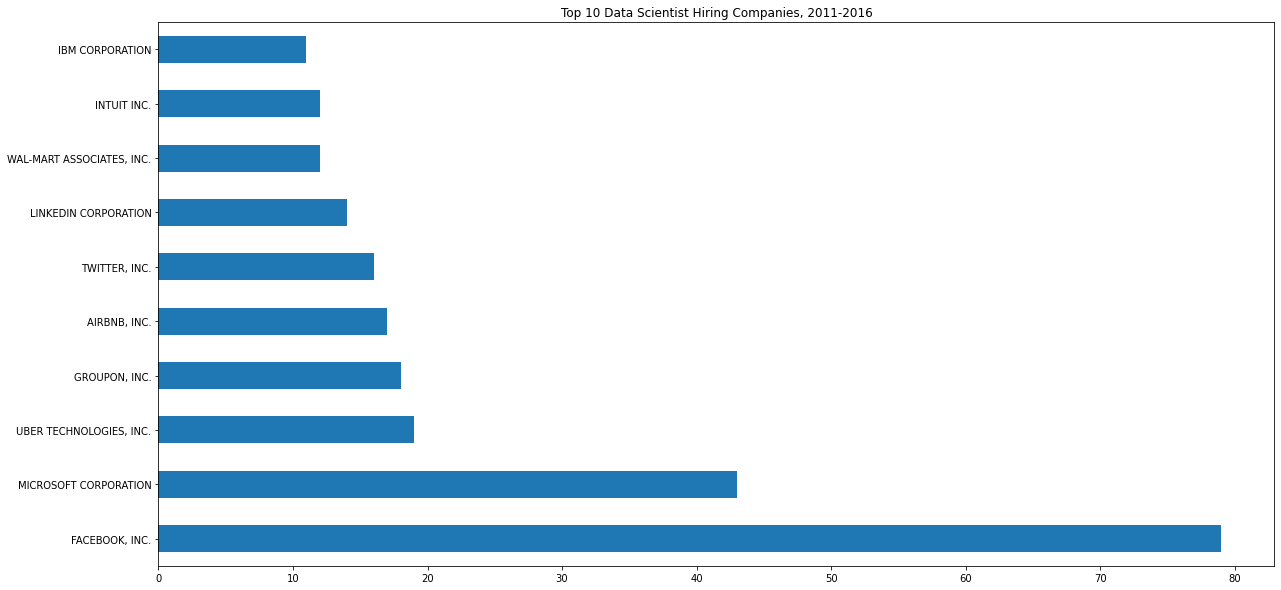

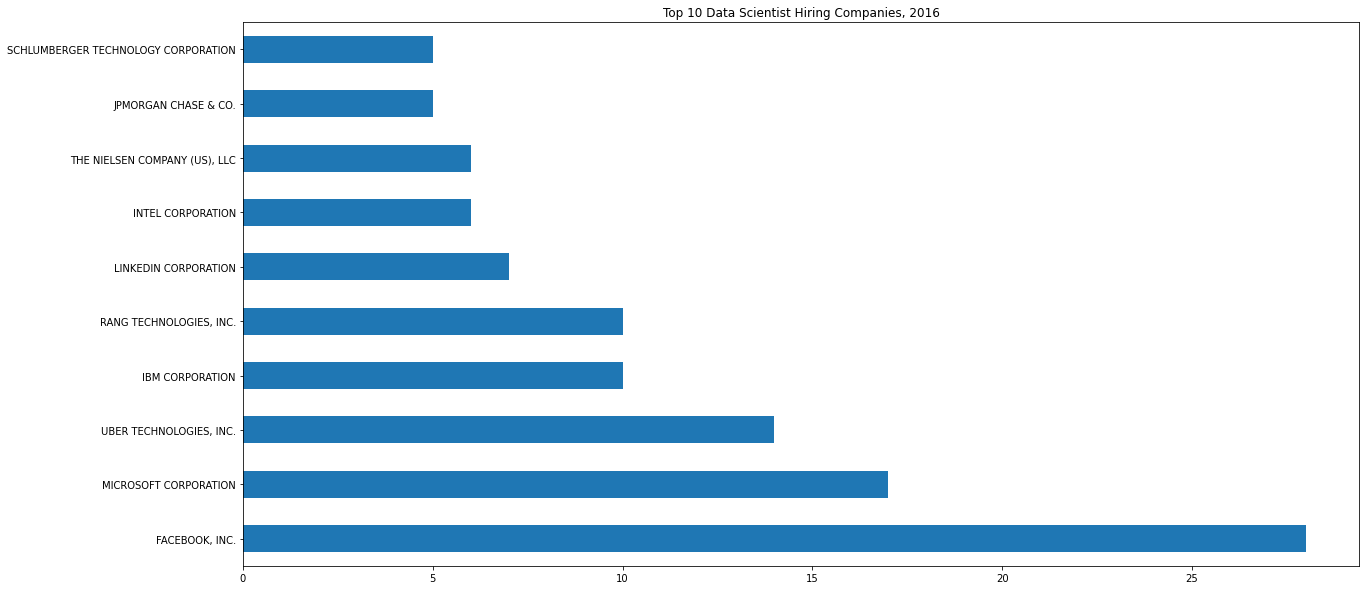

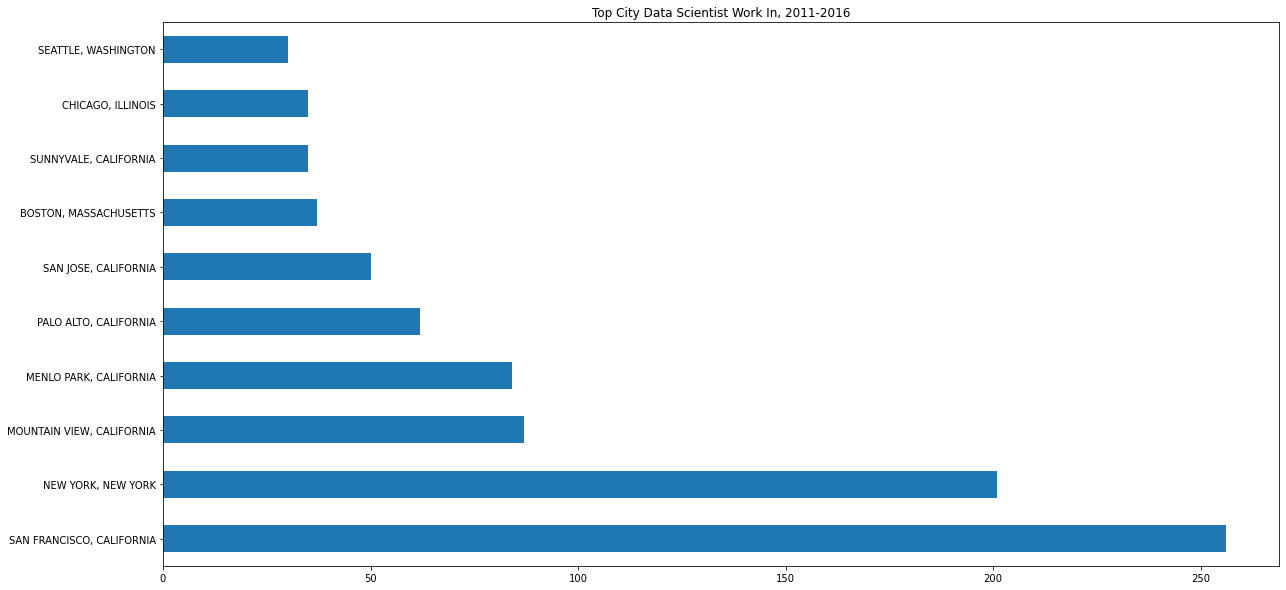

In [90]:
ax1 = h1bdat[h1bdat['JOB_TITLE'] == "DATA SCIENTIST"]['EMPLOYER_NAME'].groupby(h1bdat['EMPLOYER_NAME']).count().sort_values(ascending=False).head(10).plot(kind='barh', title="Top 10 Data Scientist Hiring Companies, 2011-2016")
ax1.set_ylabel("")
plt.show()
ax2 = h1bdat[h1bdat['JOB_TITLE'] == "DATA SCIENTIST"]['EMPLOYER_NAME'][h1bdat['YEAR'] == 2016.0].groupby(h1bdat['EMPLOYER_NAME']).count().sort_values(ascending=False).head(10).plot(kind='barh', title="Top 10 Data Scientist Hiring Companies, 2016")
ax2.set_ylabel("")
plt.show()
ax3 = h1bdat[h1bdat['JOB_TITLE'] == "DATA SCIENTIST"]['WORKSITE'].groupby(h1bdat['WORKSITE']).count().sort_values(ascending=False).head(10).plot(kind='barh', title="Top City Data Scientist Work In, 2011-2016")
ax3.set_ylabel("")
plt.show()

This result is not very surprised when top Data Scientist hiring companies are tech and IT companies. But it is still a bit surprised that half of the number of applications for Data scientist from MICROSOFT CORPORATION was in 2016!

It is also interesting that Wal-mart is in the top list for 2011 to 2016 period. Someone may ask where is Amazon? The reason could be that, as I know, Amazon does not call "the job" as Data Scientist. Sometimes they call "the job" as research/applied scientist!

Since all top IT and tech companies have offices in Silicon Valley, New York and Seattle area, top cities Data scientists work in are all in California, New York and Washington.

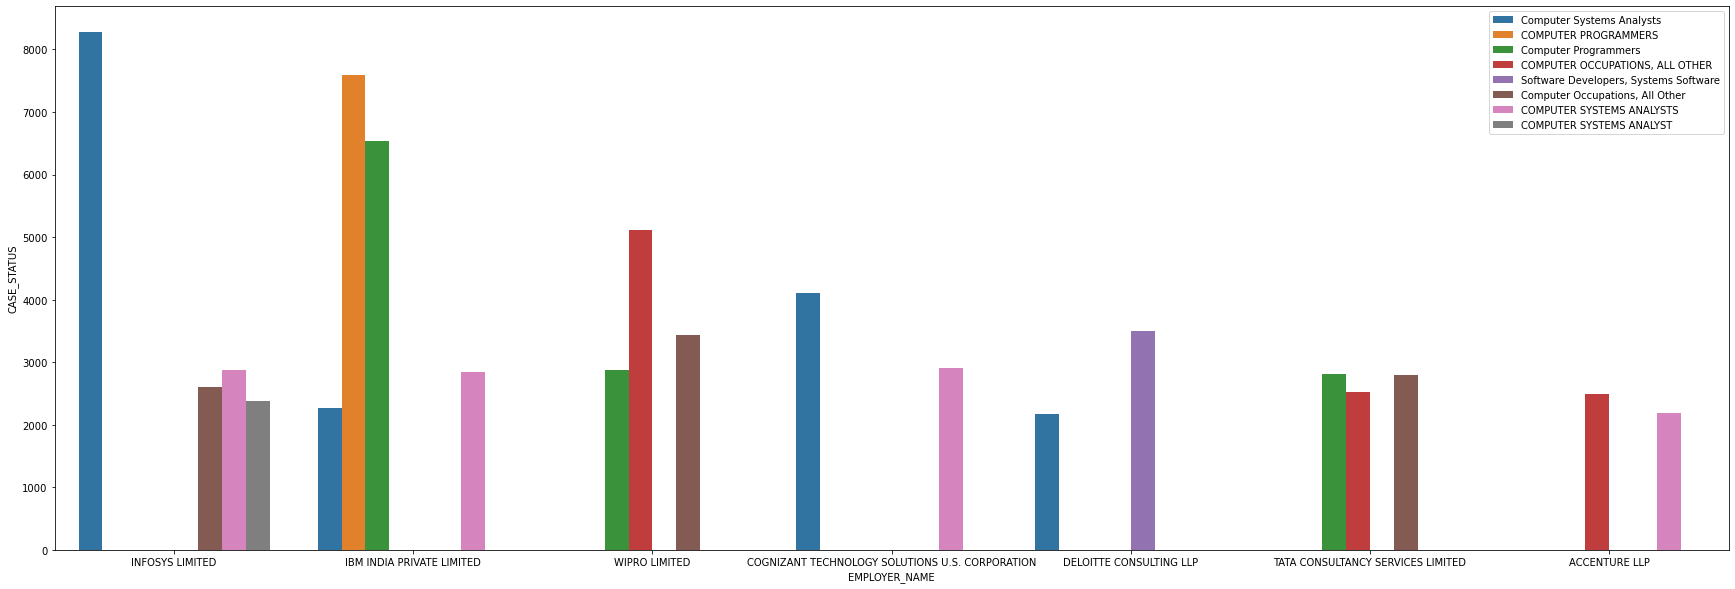

In [91]:
fig, ax = plt.subplots(figsize = (30,10))
sns.barplot(x= 'EMPLOYER_NAME',hue = 'SOC_NAME',y = 'CASE_STATUS', data = h1b.groupby(['SOC_NAME','EMPLOYER_NAME']).count()['CASE_STATUS'].sort_values(ascending = False)[:20].reset_index())
ax.legend(loc='upper right')

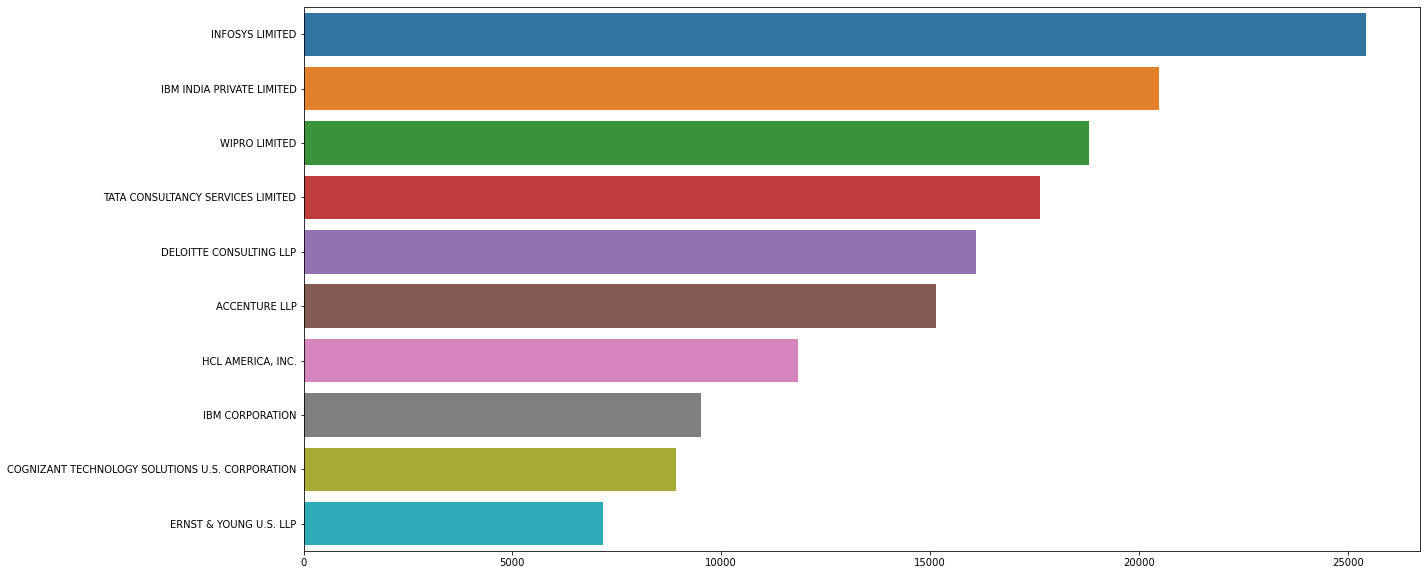

In [92]:
emp = h1b['EMPLOYER_NAME'].value_counts()[:10]
sns.barplot(x= emp.values, y = emp.index)

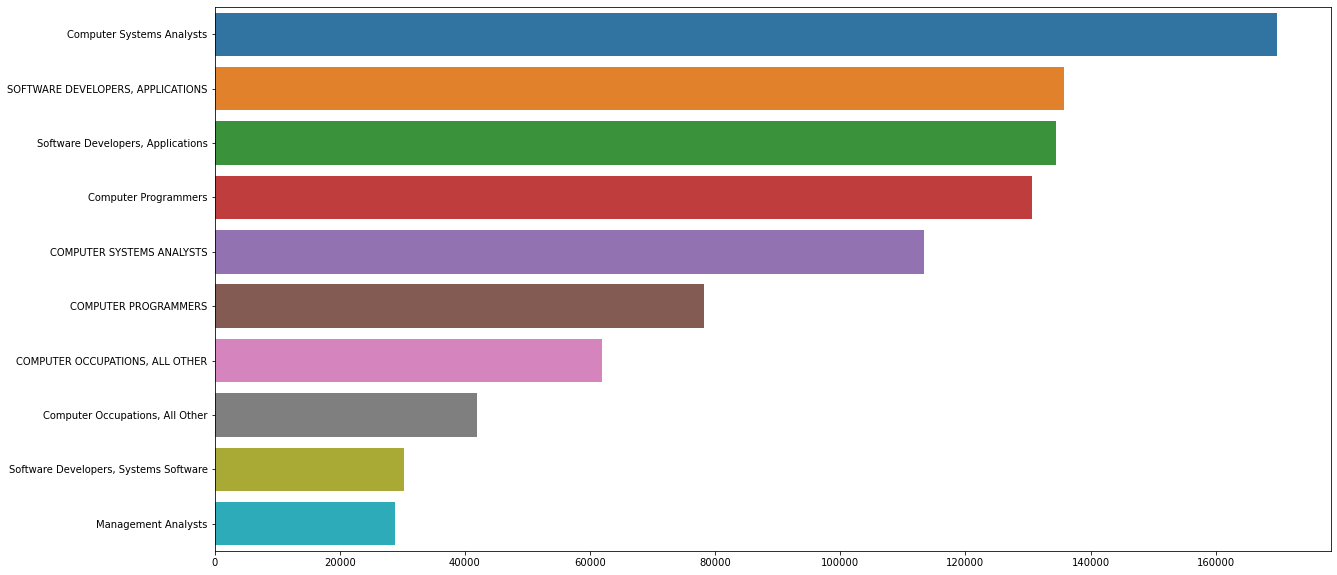

In [93]:
soc = h1b['SOC_NAME'].value_counts()[:10]
sns.barplot(x= soc.values, y = soc.index)

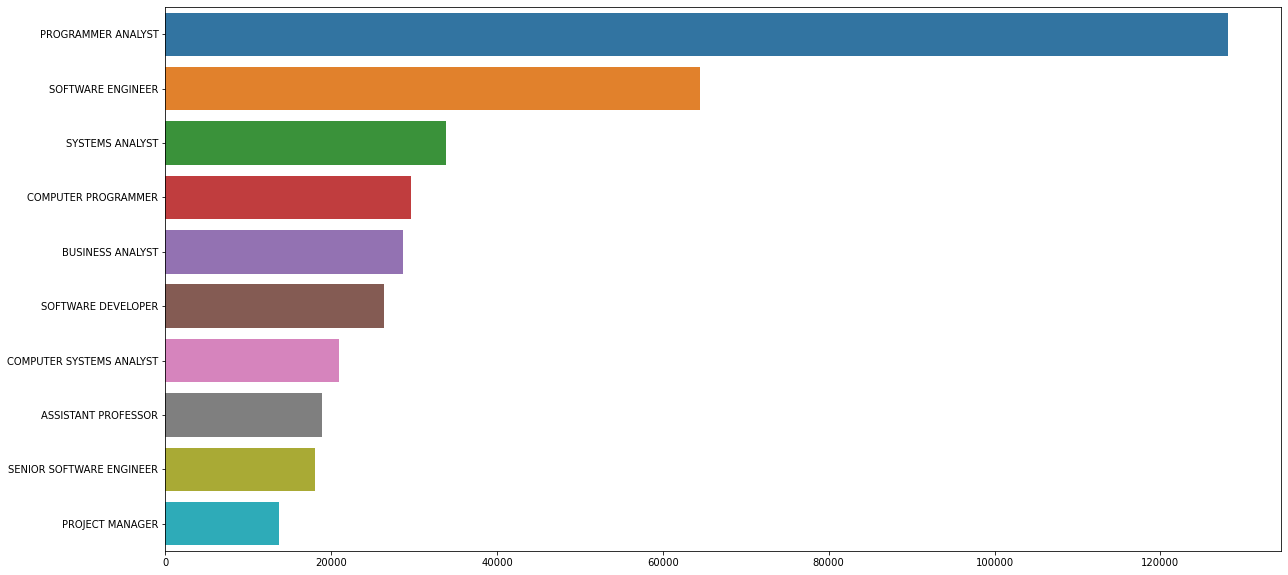

In [94]:
title = h1b['JOB_TITLE'].value_counts()[:10]
sns.barplot(x= title.values, y = title.index)

[[Text(0, 0, '2011'),
  Text(0, 0, '2012'),
  Text(0, 0, '2013'),
  Text(0, 0, '2014'),
  Text(0, 0, '2015'),
  Text(0, 0, '2016')]]

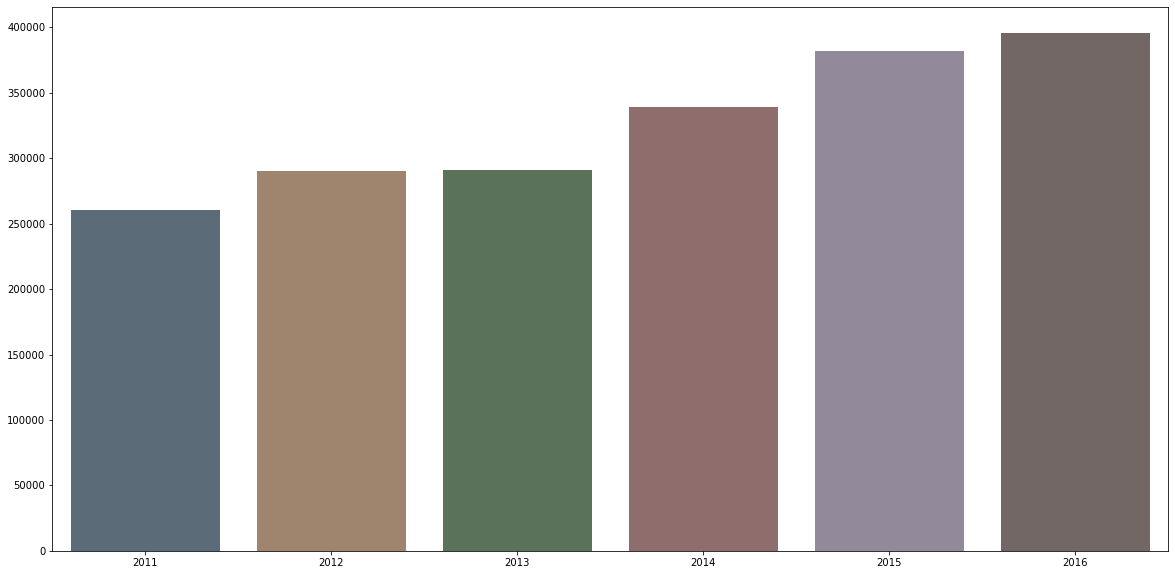

In [95]:
year = h1b['YEAR'].value_counts()[:10]
s=sns.barplot(x= year.index, y = year.values,saturation = 0.2)
s.set(xticklabels=[2011,2012,2013,2014,2015,2016])


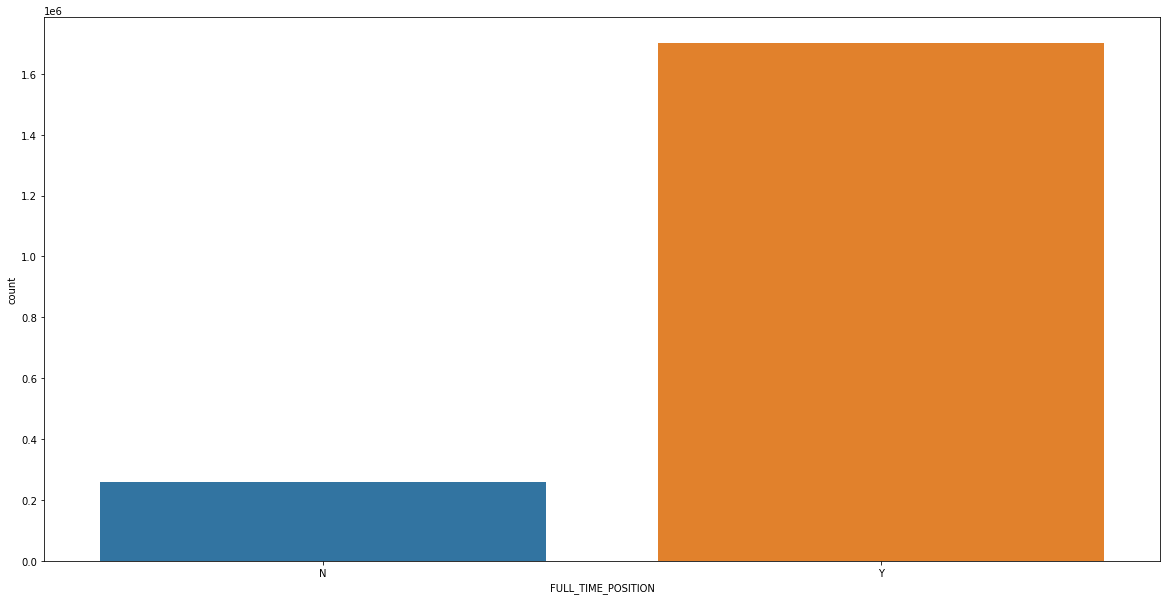

In [96]:
sns.countplot(h1b['FULL_TIME_POSITION'])

In [97]:
subset = h1b[(h1b['EMPLOYER_NAME'] == 'INFOSYS LIMITED') | (h1b['EMPLOYER_NAME'] == 'TATA CONSULTANCY SERVICES LIMITED') | (h1b['EMPLOYER_NAME'] =='WIPRO LIMITED')] 

In [98]:
subset.groupby(['EMPLOYER_NAME','YEAR']).count()['CASE_STATUS']


EMPLOYER_NAME                      YEAR
INFOSYS LIMITED                    2011     166
                                   2012    6193
                                   2013    5077
                                   2014    4253
                                   2015    4346
                                   2016    5411
TATA CONSULTANCY SERVICES LIMITED  2011    1602
                                   2012    1781
                                   2013    2631
                                   2014    3943
                                   2015    4557
                                   2016    3116
WIPRO LIMITED                      2011     582
                                   2012    2783
                                   2013    3126
                                   2014    3635
                                   2015    4665
                                   2016    4022
Name: CASE_STATUS, dtype: int64

[[Text(0, 0, '2011'),
  Text(0, 0, '2012'),
  Text(0, 0, '2013'),
  Text(0, 0, '2014'),
  Text(0, 0, '2015'),
  Text(0, 0, '2016')]]

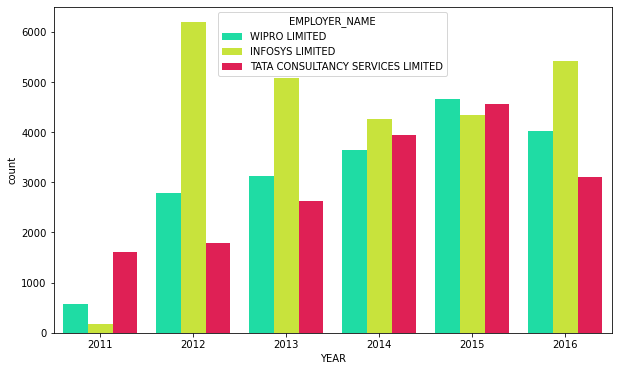

In [99]:
fig, ax = plt.subplots(figsize = (10,6))

sns.countplot(palette = 'gist_ncar',x= 'YEAR',hue = 'EMPLOYER_NAME',data = subset)
ax.set(xticklabels=[2011,2012,2013,2014,2015,2016])

What happened to Infosys in 2011?

In [100]:
subset.groupby(['YEAR','EMPLOYER_NAME']).agg({'PREVAILING_WAGE':'mean'}).sort_values(by='PREVAILING_WAGE', ascending=False)

PREVAILING_WAGE
YEAR EMPLOYER_NAME                                     
2012 INFOSYS LIMITED                         466,796.22
2013 INFOSYS LIMITED                         208,653.30
     TATA CONSULTANCY SERVICES LIMITED       149,156.33
2012 TATA CONSULTANCY SERVICES LIMITED       122,807.09
2014 TATA CONSULTANCY SERVICES LIMITED       115,184.44
2016 TATA CONSULTANCY SERVICES LIMITED       107,963.95
     INFOSYS LIMITED                          76,959.56
2015 INFOSYS LIMITED                          75,165.47
2016 WIPRO LIMITED                            72,834.91
2014 INFOSYS LIMITED                          71,303.08
2015 WIPRO LIMITED                            70,966.02
2011 WIPRO LIMITED                            70,527.31
2014 WIPRO LIMITED                            70,459.58
2013 WIPRO LIMITED                            69,339.08
2011 INFOSYS LIMITED                          68,362.35
2012 WIPRO LIMITED                            66,141.56
2015 TATA CONSULTANCY SERVICES LIMITED        62,403.29
2011 TATA CONSULTANCY SERVICES LIMITED        61,302.36

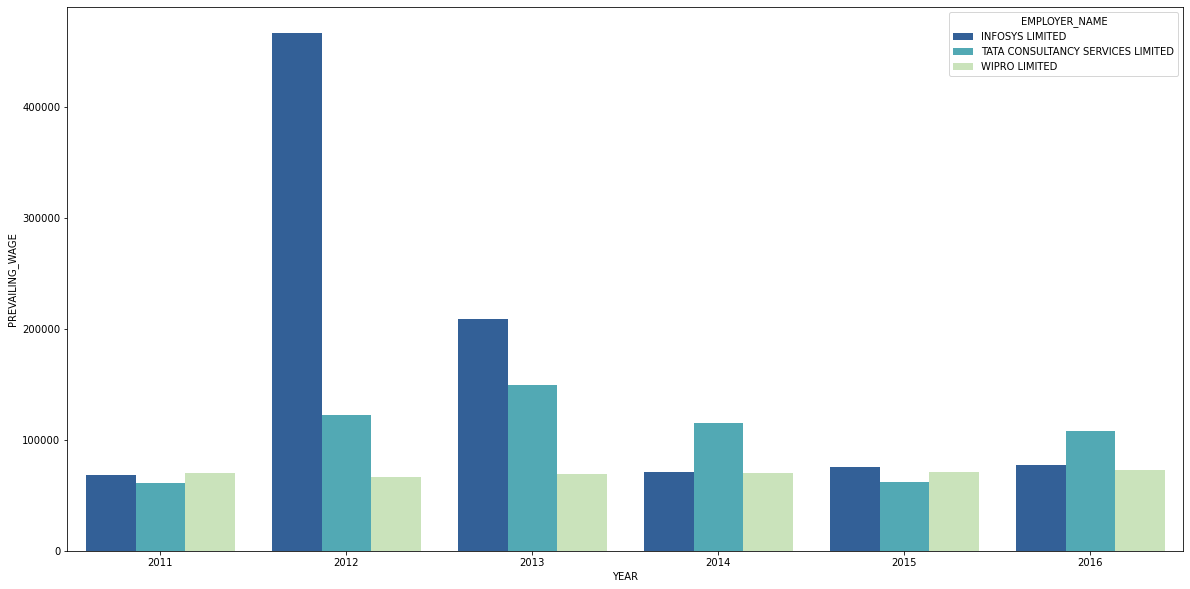

In [101]:
sns.barplot(palette = 'YlGnBu_r',x= 'YEAR',hue = 'EMPLOYER_NAME',y='PREVAILING_WAGE', data = subset.groupby(['YEAR','EMPLOYER_NAME']).agg({'PREVAILING_WAGE':'mean'}).reset_index())

In [102]:
### Plotting and comparison to the median US salary (2015)
#### Bars: Median values
#### Stars: Average values
#### Dashed line: Median US Full Time salary

In [103]:
# Salary Data according to clusters

In [104]:
H1Salary = H1LatLong
H1Salary['Salary'] = H1Info['PREVAILING_WAGE']
H1Salary['FT'] = H1Info['FULL_TIME_POSITION']

NameError: name 'H1LatLong' is not defined

In [105]:
H1City,H1State = h1b['WORKSITE'].str.split(', ',1).str #Get the states values

#Putting everything in a dataframe
H1StateCounts = H1State.value_counts()
H1StateCounts = H1StateCounts.to_frame()
H1StateCounts.columns = ['People']
H1StateCounts = H1StateCounts[H1StateCounts.index!='NA']
H1StateCounts = H1StateCounts.sort_index()

#Importing population data from the 2010 census and merging it with the dataframe with the H1 values
PopInfo = [4779736, 710231, 6392017, 2915918, 37253956, 5029196,
           3574097, 897934, 601723, 18801310, 9687653, 1360301, 
           1567582, 12830632, 6483802, 3046355, 2853118, 4339367, 
           4533372, 1328361, 5773552, 6547629, 9883640, 5303925, 
           2967297, 5988927, 989415, 1826341, 2700551, 1316470, 8791894, 
           2059179, 19378102, 9535483, 672591, 11536504, 3751351, 3831074, 
           12702379, 3725789, 1052567, 4625364, 814180, 6346105, 25145561, 
           2763885, 625741, 8001024, 6724540, 1852994, 5686986, 563626]
H1StateCounts['TotalPop'] = PopInfo

#Compute the H1s per capita
H1StateCounts['H1PerCapita'] = np.divide(H1StateCounts['People'].values,H1StateCounts['TotalPop'].values)

#Winning party in the 2016 election (double letter means >10 pp. victory difference)
H1StateCounts['Vote'] = ['RR','RR','R','RR','DD','D','DD','DD','DD','R','R','DD','RR','DD','RR','R','RR','RR','RR','D','DD','DD','R','D','RR','RR','RR','RR','D','D','DD','D','DD','R','RR','R','RR','DD','R','N','DD','RR','RR','RR','R','RR','DD','D','DD','RR','R','RR']

#Sort them by H1s per Capita
H1StateCounts.sort_values('H1PerCapita',ascending=False)

,People,TotalPop,H1PerCapita,Vote
DISTRICT OF COLUMBIA,18498,601723,0.03,DD
NEW JERSEY,127128,8791894,0.01,DD
MASSACHUSETTS,82263,6547629,0.01,DD
DELAWARE,11235,897934,0.01,DD
NEW YORK,205857,19378102,0.01,DD
CALIFORNIA,390582,37253956,0.01,DD
CONNECTICUT,30738,3574097,0.01,DD
WASHINGTON,53615,6724540,0.01,DD
ILLINOIS,100435,12830632,0.01,DD
VIRGINIA,60347,8001024,0.01,D


In [106]:
# K-Means Clustering to see where H1Bs are

In [107]:
#Reading Latitude and Longitude data (taking out N/As)
H1LatLong = h1b.loc[H1State != 'NA']
H1LatLong = H1LatLong[['lon','lat']]
H1LatLong = H1LatLong.dropna();
H1Long = H1LatLong['lon'].values
H1Lat = H1LatLong['lat'].values

In [108]:
#K-Means clustering to see where the applicants were
nClusters = 10
kmeans = KMeans(n_clusters=nClusters, random_state=0).fit(H1LatLong.values)

kl = kmeans.labels_ #Getting the cluster for each case
H1LatLong['Cluster'] = kl

H1LatLong['State'] = H1State
H1LatLong = H1LatLong.dropna()
H1LatLong.sort_values('Cluster')
print(H1LatLong[['Cluster','State']].drop_duplicates().sort_values('Cluster')) #See which states a cluster cover


      Cluster         State
97          0        NEVADA
828         0       ARIZONA
8           0    CALIFORNIA
3758        1          OHIO
63          1      MARYLAND
...       ...           ...
45          9      NEW YORK
35          9  RHODE ISLAND
3           9    NEW JERSEY
1848        9       VERMONT
301         9   CONNECTICUT

[75 rows x 2 columns]


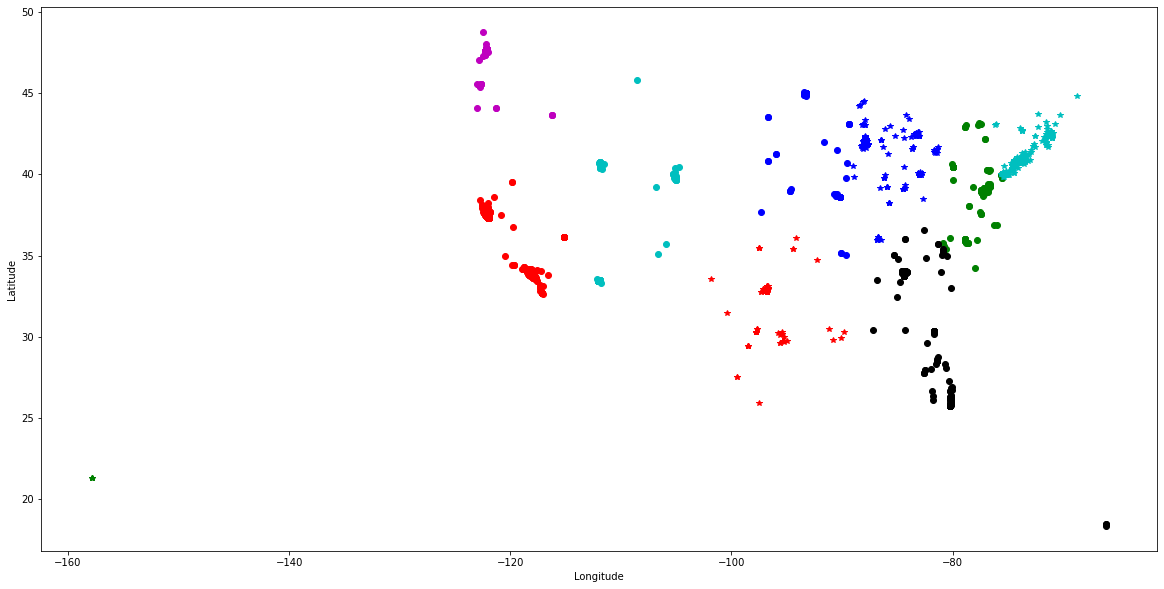

In [109]:
pltIndex = range(0,10501,5)

plt.plot(H1LatLong.iloc[pltIndex,0].loc[H1LatLong.iloc[pltIndex,2] == 0], H1LatLong.iloc[pltIndex,1].loc[H1LatLong.iloc[pltIndex,2] == 0], "ro")
plt.plot(H1LatLong.iloc[pltIndex,0].loc[H1LatLong.iloc[pltIndex,2] == 1], H1LatLong.iloc[pltIndex,1].loc[H1LatLong.iloc[pltIndex,2] == 1], "go")
plt.plot(H1LatLong.iloc[pltIndex,0].loc[H1LatLong.iloc[pltIndex,2] == 2], H1LatLong.iloc[pltIndex,1].loc[H1LatLong.iloc[pltIndex,2] == 2], "bo")
plt.plot(H1LatLong.iloc[pltIndex,0].loc[H1LatLong.iloc[pltIndex,2] == 3], H1LatLong.iloc[pltIndex,1].loc[H1LatLong.iloc[pltIndex,2] == 3], "co")
plt.plot(H1LatLong.iloc[pltIndex,0].loc[H1LatLong.iloc[pltIndex,2] == 4], H1LatLong.iloc[pltIndex,1].loc[H1LatLong.iloc[pltIndex,2] == 4], "mo")
plt.plot(H1LatLong.iloc[pltIndex,0].loc[H1LatLong.iloc[pltIndex,2] == 5], H1LatLong.iloc[pltIndex,1].loc[H1LatLong.iloc[pltIndex,2] == 5], "ko")
plt.plot(H1LatLong.iloc[pltIndex,0].loc[H1LatLong.iloc[pltIndex,2] == 6], H1LatLong.iloc[pltIndex,1].loc[H1LatLong.iloc[pltIndex,2] == 6], "r*")
plt.plot(H1LatLong.iloc[pltIndex,0].loc[H1LatLong.iloc[pltIndex,2] == 7], H1LatLong.iloc[pltIndex,1].loc[H1LatLong.iloc[pltIndex,2] == 7], "g*")
plt.plot(H1LatLong.iloc[pltIndex,0].loc[H1LatLong.iloc[pltIndex,2] == 8], H1LatLong.iloc[pltIndex,1].loc[H1LatLong.iloc[pltIndex,2] == 8], "b*")
plt.plot(H1LatLong.iloc[pltIndex,0].loc[H1LatLong.iloc[pltIndex,2] == 9], H1LatLong.iloc[pltIndex,1].loc[H1LatLong.iloc[pltIndex,2] == 9], "c*")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Salary Data according to clusters

In [111]:
H1Salary = H1LatLong
H1Salary['Salary'] = h1b['PREVAILING_WAGE']
H1Salary['FT'] = h1b['FULL_TIME_POSITION']

In [112]:
salaryMin = np.zeros(nClusters)
salaryMax = np.zeros(nClusters)
salaryMean = np.zeros(nClusters)
salaryMedian = np.zeros(nClusters)
salaryStd = np.zeros(nClusters)

for k in range(0,nClusters):
    salaryClustered = H1Salary.loc[H1Salary['Cluster'] == k]
    salaryClustered = salaryClustered.loc[salaryClustered['FT'] == 'Y'] #We only consider full-time employment
    salaryClustered = salaryClustered.loc[salaryClustered['Salary'] <= 5000000] #We take out extreme outliers
    salaryClustered = salaryClustered.loc[salaryClustered['Salary'] > 0] # We take out non-paid positions
    salaryClustered = salaryClustered.dropna()
    salaryMin[k] = np.min(salaryClustered['Salary'].values)
    salaryMax[k] = np.max(salaryClustered['Salary'].values)
    salaryMean[k] = np.mean(salaryClustered['Salary'].values)
    salaryMedian[k] = np.median(salaryClustered['Salary'].values)
    salaryStd[k] = np.std(salaryClustered['Salary'].values)


In [113]:
#Statistics
salaryStats = pd.DataFrame()
salaryStats['Mean'] = salaryMean.astype(int)
salaryStats['Median'] = salaryMedian.astype(int)
salaryStats['Std'] = salaryStd.astype(int)
salaryStats['Min'] = salaryMin.astype(int)
salaryStats['Max'] = salaryMax
salaryStats

,Mean,Median,Std,Min,Max
0,85305,80995,38138,2000,"4,985,760.00"
1,69837,67101,35645,63,"4,729,920.00"
2,67593,62358,39691,15080,"4,189,120.00"
3,69747,65728,44560,2011,"4,648,800.00"
4,80145,77792,33682,14851,"2,897,400.00"
5,66631,61506,51372,2012,"4,848,792.00"
6,70701,66102,40346,14000,"4,996,888.00"
7,60848,55008,38574,16827,"1,040,000.00"
8,66756,62754,30318,15070,"4,538,560.00"
9,75627,70554,41327,2012,"4,865,100.00"


In [114]:
### Plotting and comparison to the median US salary (2015)
#### Bars: Median values
#### Stars: Average values
#### Dashed line: Median US Full Time salary

# Analyze the H1Bs by the status of their visa applications

['CERTIFIED' 'CERTIFIED-WITHDRAWN' 'DENIED' 'WITHDRAWN' 'Others']
[1652785  156692   76206   73403      17]


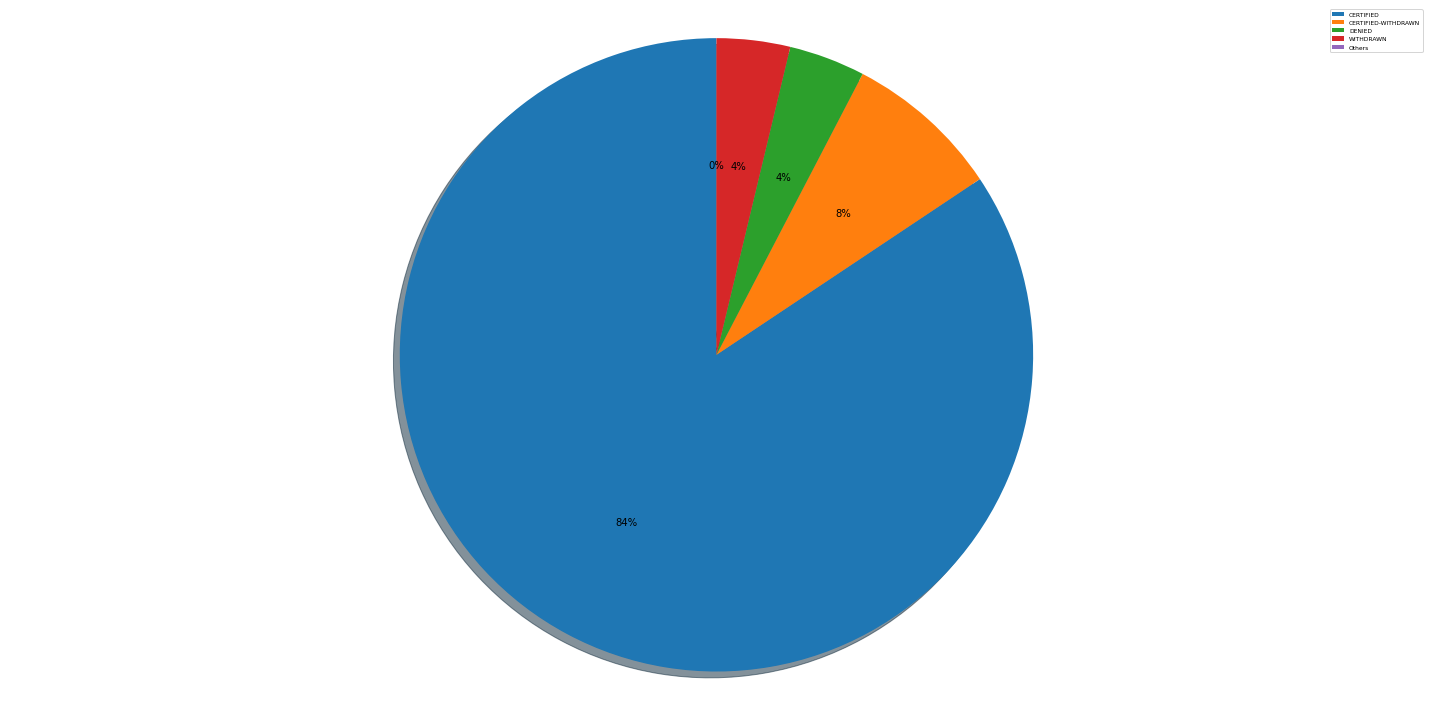

In [115]:
statusCount = h1b['CASE_STATUS'].value_counts()
statusTypes = statusCount.index.copy(deep=True)
statusTypes = statusTypes.values
statusTypes[4] = 'Others'
statusTypes = statusTypes[0:5]

statusValues = statusCount.copy()
statusValues = statusValues.values
statusValues[4] = np.sum(statusValues[4:7])
statusValues = statusValues[0:5]
print(statusTypes)
print(statusValues)

fig1 = plt.pie(statusValues, autopct='%1.0f%%', shadow=True, startangle=90)
plt.legend(statusTypes, loc="best", prop={'size':6})
plt.axis('equal')
plt.tight_layout()
plt.show()

# Who required the most  Data Scientist positions?

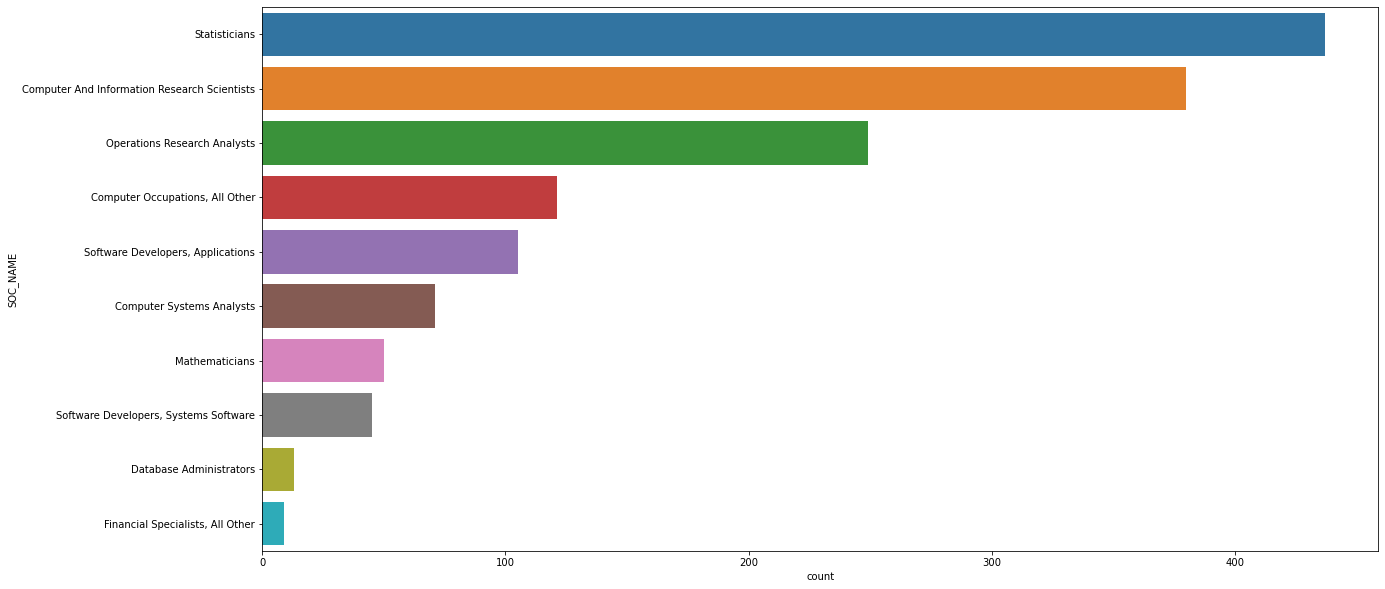

In [116]:

countlist=[]
h1b['SOC_NAME']=h1b['SOC_NAME'].map(lambda x:str(x).title())
for i ,j in h1b[h1b['JOB_TITLE']=='DATA SCIENTIST'][['SOC_NAME','JOB_TITLE']].groupby(by=['SOC_NAME']):
    countlist.append([i,len(j)])
countdf=pd.DataFrame(countlist,columns=['SOC_NAME','count'])
#countdf=countdf.set_index('WORKSITE')                                           
countdf=countdf.sort_values(by=['count'],ascending=False)
sns.barplot(data=countdf.head(10),y='SOC_NAME',x='count',orient='h')

plt.show()


# Which employers file the most petitions each year?


In [117]:
countlist=[]
company_total_df=[]
for i,j in h1b.groupby(by=['EMPLOYER_NAME']):
    company_total_df.append([i,len(j)])
    for k,q in j.groupby(by=['YEAR']):
        countlist.append([i,k,len(q)])

countlistdf=pd.DataFrame(countlist,columns=['Emp_name','year','count'])
company_total_df_dataframe=pd.DataFrame(company_total_df,columns=['Emp_name','count'])

                                           
company_total_df_dataframe=company_total_df_dataframe.sort_values(by=['count'],ascending=False)
names=company_total_df_dataframe.head(10)['Emp_name'].tolist()
top10_comp=countlistdf[countlistdf['Emp_name'].isin(names)]
hash_index=[]
for i in names:
    hash_index+=list(top10_comp[top10_comp['Emp_name']==i].index)
top10_comp=top10_comp.loc[hash_index]
sns.barplot(data=top10_comp,x='Emp_name',y='count',hue='year',orient='v')
plt.xticks(rotation=90)

plt.show()

KeyboardInterrupt: 

# Which part of the US has the most Hardware Engineering  jobs? 


In [ ]:
countlist=[]
for i ,j in h1b[h1b['JOB_TITLE']=='HARDWARE ENGINEER'][['JOB_TITLE','WORKSITE']].groupby(by=['WORKSITE']):
    countlist.append([i,len(j)])
countdf=pd.DataFrame(countlist,columns=['WORKSITE','count'])
#countdf=countdf.set_index('WORKSITE')                                           
countdf=countdf.sort_values(by=['count'],ascending=False)
sns.barplot(data=countdf.head(10),y='WORKSITE',x='count',orient='h')


In [ ]:
h1b['WORKSITE'].value_counts()[0:5]

In [ ]:
cases=['CERTIFIED-WITHDRAWN','WITHDRAWN','CERTIFIED','DENIED']


In [ ]:
c2=h1b[['YEAR','CASE_STATUS']]
c2=c2[c2['CASE_STATUS'].isin(cases)]
c2.head()

In [ ]:
ax=sns.factorplot('YEAR',data=h1b,hue='CASE_STATUS', kind='count', palette='PRGn', size=10,aspect=2.)
sns.set(style='white', color_codes=True)

In [ ]:
h1b

In [ ]:
h1b.columns

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [119]:
X = h1b[['PREVAILING_WAGE','YEAR','lon','lat']]
y = h1b['CASE_STATUS']

In [120]:
X_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [121]:
X=StandardScaler().fit_transform(X)

In [122]:
lg = RandomForestClassifier()
lg.fit(X_train,y_train)

RandomForestClassifier()

In [123]:
# PRedctions for test set
preds = lg.predict(x_test)

# To Do : get f1, precision, recall
# To DO : How to get probability of the prediction

In [124]:
preds


array(['CERTIFIED-WITHDRAWN', 'CERTIFIED', 'CERTIFIED', ..., 'CERTIFIED',
       'CERTIFIED', 'CERTIFIED'], dtype=object)

In [125]:
from sklearn.metrics import accuracy_score
y_pred = ['CERTIFIED-WITHDRAWN', 'CERTIFIED', 'CERTIFIED',  'CERTIFIED',
       'CERTIFIED', 'CERTIFIED-WITHDRAWN']
y_true = ['CERTIFIED','CERTIFIED','CERTIFIED'
              ,'CERTIFIED'
               ,'CERTIFIED',
                    
                'CERTIFIED',
              ]
accuracy_score(y_true, y_pred)


0.6666666666666666

In [126]:
accuracy_score(y_true, y_pred, normalize=False)


4

In [127]:
 from sklearn.metrics import precision_score
y_true = ['CERTIFIED','CERTIFIED','CERTIFIED'
              ,'CERTIFIED'
               ,'CERTIFIED',
                    
                'CERTIFIED',
              ]
y_pred = ['CERTIFIED-WITHDRAWN', 'CERTIFIED', 'CERTIFIED',  'CERTIFIED',
       'CERTIFIED', 'CERTIFIED-WITHDRAWN']
 precision_score(y_true, y_pred, average='macro')
   

0.5

In [128]:
 precision_score(y_true, y_pred, average='micro')


0.6666666666666666

In [129]:
precision_score(y_true, y_pred, average='weighted')

1.0

In [130]:
 precision_score(y_true, y_pred, average=None)


array([1., 0.])

In [131]:
precision_score(y_true, y_pred, average=None)


array([1., 0.])

In [132]:
precision_score(y_true, y_pred, average=None, zero_division=1)


array([1., 0.])

In [133]:
 from sklearn.metrics import f1_score
y_true = ['CERTIFIED','CERTIFIED','CERTIFIED'
              ,'CERTIFIED'
               ,'CERTIFIED',
                    
                'CERTIFIED',
            ]
y_pred = ['CERTIFIED-WITHDRAWN', 'CERTIFIED', 'CERTIFIED',  'CERTIFIED',
       'CERTIFIED', 'CERTIFIED-WITHDRAWN']
f1_score(y_true, y_pred, average='macro')
  

0.4

In [134]:
  f1_score(y_true, y_pred, average='micro')
    

0.6666666666666666

In [135]:
f1_score(y_true, y_pred, average='weighted')
    

0.8000000000000002

In [136]:
    f1_score(y_true, y_pred, average=None)


array([0.8, 0. ])

In [137]:
# Only keep certified, certified denied and withdrawn(merge certified withdrawn into certified) use .map()
# Map both certified and certified withdrawn to certified
# do standard scale or max-min scale only for X

In [138]:
h1b['CASE_STATUS'].value_counts()

CERTIFIED                                             1652785
CERTIFIED-WITHDRAWN                                    156692
DENIED                                                  76206
WITHDRAWN                                               73403
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
INVALIDATED                                                 1
REJECTED                                                    1
Name: CASE_STATUS, dtype: int64

In [139]:
y_train

601167               CERTIFIED
1363604              CERTIFIED
2807473              CERTIFIED
1109267              CERTIFIED
154246     CERTIFIED-WITHDRAWN
                  ...         
318199               CERTIFIED
427983               CERTIFIED
247283               CERTIFIED
1751034              CERTIFIED
1953873              CERTIFIED
Name: CASE_STATUS, Length: 1567282, dtype: object

In [140]:
# .map({'fox': 'cub', 'cow': 'calf'})


In [ ]:
h1b['CASE_STATUS']

In [ ]:
# from sklearn.preprocessing import StandardScaler
# X = h1b[['PREVAILING_WAGE','YEAR','lon','lat']]
# scaler = StandardScaler()
